# Regressão Logística

Estudo da metodologia de regressão logística para classificação de peças de vestuário utilizando o framework TF

Dados:
    - Dataset Fashion Mnist
        - Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
        
        
RoadMap:

1) Os pesos são inicializados com valores aleatórios seguindo uma distribuição normal.

2) Para cada elemento do conjunto de treino é calculado o erro, ou seja, a diferença entre a saída prevista e a saída real. Este erro é usado para ajustar os pesos. 

3) O processo é repetido em todos os exemplos do conjunto de treinamento até que o erro em todo o conjunto de treinamento não seja inferior a um certo limite, ou até que o número máximo de iterações seja atingido.

In [9]:
# Carregar pacotes
import math
import tensorflow as tf

import matplotlib.pyplot as plt

In [11]:
#dataset
from tensorflow.keras.datasets import fashion_mnist

(x_treino, y_treino), (x_teste, y_teste) = fashion_mnist.load_data()

In [14]:
# Definir labels
class_names = {i:class_n for i, class_n in enumerate(['T-shirt/top', 'Trouser', 
                                            'Pullover', 'Dress', 
                                            'Coat', 'Sandal', 
                                            'Shirt', 'Sneaker', 
                                            'Bag', 'Ankle boot']) }

In [12]:
# Funcao para visualizar imagens
def plot_img(images, labels, predictions=None):
    
    # Criar grid de 5 colunas
    n_cols = min(5, len(images))
    n_rows = math.ceil(len(images) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols + 3, n_rows +4))
    
    # Checar se foram realizas previsoes
    if predictions is None:
        predictions = [None] * len(labels)
        
    # Loop para percorrer os dados e imprimir img
    for i, (x,y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes.flat[i]
        ax.imshow(x, cmap = plt.cm.binary)
        
        # imprimir valor real - y
        ax.set_title(f"L: {class_names[y_true]}")
        
        # se existir previsao - imprimir
        if y_pred is not None:
            ax.set_xlabel(f"Prev:{class_names[y_pred]}")
        
        ax.set_xticks([])
        ax.set_yticks([])

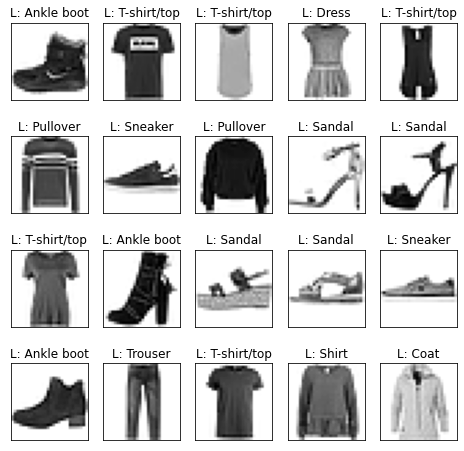

In [15]:
# Plot de algumas imagens
plot_img(x_treino[:20], y_treino[:20])
plt.show()

In [16]:
# Normalizar imagens
x_treino, x_teste = x_treino/255., x_teste/255.

# Ajusta o shape de x de 28x28 para 784
x_treino = tf.reshape(x_treino, shape = (-1, 784))
x_teste  = tf.reshape(x_teste, shape = (-1, 784))

In [19]:
x_treino

<tf.Tensor: shape=(60000, 784), dtype=float64, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])>

# Modelo

In [36]:
# Inicializar coeficientes de forma randômica - distribuição normal
pesos = tf.Variable(tf.random.normal(shape=(784,10), dtype=tf.float64))
vieses = tf.Variable(tf.random.normal(shape=(10,),dtype=tf.float64))

In [37]:
# Modelo matemático regressão logística
# g(y) = β(x) + βo  
def logistic_regression(x):
    lr = tf.add(tf.matmul(x,pesos), vieses)
    return lr

In [38]:
# Minimizar erro com cross entropy (Função de Custo)

# função de erro de entropia cruzada.
def cross_entropy(y_true, y_pred):
    y_true = tf.one_hot(y_true, 10)
    loss = tf.nn.softmax_cross_entropy_with_logits(labels = y_true, logits = y_pred)
    return tf.reduce_mean(loss)

# Otimizando a Cost Function
# Minimizar a função de custo usando o algoritmo de otimização de descida de gradiente
def grad(x, y):
    with tf.GradientTape() as tape:
        y_pred = logistic_regression(x)
        loss_val = cross_entropy(y, y_pred)
    return tape.gradient(loss_val, [pesos, vieses])

In [39]:
# Hiperparâmetros
n_batches = 10000
learning_rate = 0.01
batch_size = 128

In [40]:
# Otimizador usando SGD (Stochastic Gradient Descent)
optimizer = tf.optimizers.SGD(learning_rate)

In [41]:
# Função para o cálculo da Acurácia
def accuracy(y_true, y_pred):
    y_true = tf.cast(y_true, dtype = tf.int32)
    preds = tf.cast(tf.argmax(y_pred, axis = 1), dtype = tf.int32)
    preds = tf.equal(y_true, preds)
    return tf.reduce_mean(tf.cast(preds, dtype = tf.float32))

In [42]:
# Preparar batches - dados de treino
dataset_treino = tf.data.Dataset.from_tensor_slices((x_treino, y_treino))
dataset_treino = dataset_treino.repeat().shuffle(x_treino.shape[0]).batch(batch_size)

In [43]:
# Ciclo de treinamento
for batch_numb, (batch_xs_treino, batch_ys_treino) in enumerate(dataset_treino.take(n_batches), 1):

    # Calcula os gradientes
    gradientes = grad(batch_xs_treino, batch_ys_treino)

    # Otimiza os pesos com o valor do gradiente
    optimizer.apply_gradients(zip(gradientes, [pesos, vieses]))

    # Faz uma previsão
    y_pred = logistic_regression(batch_xs_treino)

    # Calcula o erro
    loss = cross_entropy(batch_ys_treino, y_pred)

    # Calcula a acurácia
    acc = accuracy(batch_ys_treino, y_pred)

    # Print
    print("Número do Batch: %i, Erro do Modelo: %f, Acurácia em Treino: %f" % (batch_numb, loss, acc))

print ("\nTreinamento concluído!")

Número do Batch: 1, Erro do Modelo: 15.504805, Acurácia em Treino: 0.109375
Número do Batch: 2, Erro do Modelo: 16.012837, Acurácia em Treino: 0.109375
Número do Batch: 3, Erro do Modelo: 15.360521, Acurácia em Treino: 0.148438
Número do Batch: 4, Erro do Modelo: 16.253779, Acurácia em Treino: 0.085938
Número do Batch: 5, Erro do Modelo: 14.302569, Acurácia em Treino: 0.101562
Número do Batch: 6, Erro do Modelo: 15.754445, Acurácia em Treino: 0.093750
Número do Batch: 7, Erro do Modelo: 11.911937, Acurácia em Treino: 0.140625
Número do Batch: 8, Erro do Modelo: 12.871050, Acurácia em Treino: 0.117188
Número do Batch: 9, Erro do Modelo: 14.845847, Acurácia em Treino: 0.093750
Número do Batch: 10, Erro do Modelo: 14.368914, Acurácia em Treino: 0.062500
Número do Batch: 11, Erro do Modelo: 13.302659, Acurácia em Treino: 0.062500
Número do Batch: 12, Erro do Modelo: 12.686367, Acurácia em Treino: 0.140625
Número do Batch: 13, Erro do Modelo: 13.761329, Acurácia em Treino: 0.148438
Número d

Número do Batch: 115, Erro do Modelo: 8.380117, Acurácia em Treino: 0.179688
Número do Batch: 116, Erro do Modelo: 7.827175, Acurácia em Treino: 0.156250
Número do Batch: 117, Erro do Modelo: 8.709225, Acurácia em Treino: 0.171875
Número do Batch: 118, Erro do Modelo: 7.293335, Acurácia em Treino: 0.171875
Número do Batch: 119, Erro do Modelo: 8.358074, Acurácia em Treino: 0.132812
Número do Batch: 120, Erro do Modelo: 7.049371, Acurácia em Treino: 0.203125
Número do Batch: 121, Erro do Modelo: 7.893911, Acurácia em Treino: 0.156250
Número do Batch: 122, Erro do Modelo: 7.370440, Acurácia em Treino: 0.164062
Número do Batch: 123, Erro do Modelo: 7.482516, Acurácia em Treino: 0.140625
Número do Batch: 124, Erro do Modelo: 8.634552, Acurácia em Treino: 0.093750
Número do Batch: 125, Erro do Modelo: 6.776315, Acurácia em Treino: 0.187500
Número do Batch: 126, Erro do Modelo: 7.607624, Acurácia em Treino: 0.117188
Número do Batch: 127, Erro do Modelo: 8.228986, Acurácia em Treino: 0.140625

Número do Batch: 225, Erro do Modelo: 6.313925, Acurácia em Treino: 0.179688
Número do Batch: 226, Erro do Modelo: 5.601555, Acurácia em Treino: 0.210938
Número do Batch: 227, Erro do Modelo: 6.352075, Acurácia em Treino: 0.179688
Número do Batch: 228, Erro do Modelo: 5.327079, Acurácia em Treino: 0.226562
Número do Batch: 229, Erro do Modelo: 6.011216, Acurácia em Treino: 0.273438
Número do Batch: 230, Erro do Modelo: 6.059648, Acurácia em Treino: 0.218750
Número do Batch: 231, Erro do Modelo: 6.101517, Acurácia em Treino: 0.195312
Número do Batch: 232, Erro do Modelo: 6.231006, Acurácia em Treino: 0.203125
Número do Batch: 233, Erro do Modelo: 5.468398, Acurácia em Treino: 0.203125
Número do Batch: 234, Erro do Modelo: 5.363530, Acurácia em Treino: 0.250000
Número do Batch: 235, Erro do Modelo: 5.259186, Acurácia em Treino: 0.273438
Número do Batch: 236, Erro do Modelo: 5.123709, Acurácia em Treino: 0.289062
Número do Batch: 237, Erro do Modelo: 6.214369, Acurácia em Treino: 0.203125

Número do Batch: 343, Erro do Modelo: 5.279745, Acurácia em Treino: 0.250000
Número do Batch: 344, Erro do Modelo: 5.081472, Acurácia em Treino: 0.312500
Número do Batch: 345, Erro do Modelo: 5.274402, Acurácia em Treino: 0.257812
Número do Batch: 346, Erro do Modelo: 5.066072, Acurácia em Treino: 0.250000
Número do Batch: 347, Erro do Modelo: 4.507030, Acurácia em Treino: 0.234375
Número do Batch: 348, Erro do Modelo: 5.618105, Acurácia em Treino: 0.242188
Número do Batch: 349, Erro do Modelo: 4.430169, Acurácia em Treino: 0.289062
Número do Batch: 350, Erro do Modelo: 4.082154, Acurácia em Treino: 0.304688
Número do Batch: 351, Erro do Modelo: 5.211677, Acurácia em Treino: 0.343750
Número do Batch: 352, Erro do Modelo: 4.530505, Acurácia em Treino: 0.335938
Número do Batch: 353, Erro do Modelo: 4.135365, Acurácia em Treino: 0.343750
Número do Batch: 354, Erro do Modelo: 4.697258, Acurácia em Treino: 0.257812
Número do Batch: 355, Erro do Modelo: 5.018684, Acurácia em Treino: 0.257812

Número do Batch: 461, Erro do Modelo: 5.021050, Acurácia em Treino: 0.343750
Número do Batch: 462, Erro do Modelo: 4.410749, Acurácia em Treino: 0.328125
Número do Batch: 463, Erro do Modelo: 3.979957, Acurácia em Treino: 0.406250
Número do Batch: 464, Erro do Modelo: 3.676543, Acurácia em Treino: 0.359375
Número do Batch: 465, Erro do Modelo: 4.528564, Acurácia em Treino: 0.406250
Número do Batch: 466, Erro do Modelo: 3.561373, Acurácia em Treino: 0.375000
Número do Batch: 467, Erro do Modelo: 3.858034, Acurácia em Treino: 0.375000
Número do Batch: 468, Erro do Modelo: 4.534500, Acurácia em Treino: 0.265625
Número do Batch: 469, Erro do Modelo: 3.620119, Acurácia em Treino: 0.421875
Número do Batch: 470, Erro do Modelo: 3.801649, Acurácia em Treino: 0.351562
Número do Batch: 471, Erro do Modelo: 4.114701, Acurácia em Treino: 0.343750
Número do Batch: 472, Erro do Modelo: 4.905489, Acurácia em Treino: 0.367188
Número do Batch: 473, Erro do Modelo: 4.093096, Acurácia em Treino: 0.367188

Número do Batch: 569, Erro do Modelo: 3.594816, Acurácia em Treino: 0.367188
Número do Batch: 570, Erro do Modelo: 3.878302, Acurácia em Treino: 0.343750
Número do Batch: 571, Erro do Modelo: 3.603016, Acurácia em Treino: 0.343750
Número do Batch: 572, Erro do Modelo: 4.738009, Acurácia em Treino: 0.328125
Número do Batch: 573, Erro do Modelo: 4.171301, Acurácia em Treino: 0.453125
Número do Batch: 574, Erro do Modelo: 4.483974, Acurácia em Treino: 0.375000
Número do Batch: 575, Erro do Modelo: 3.508941, Acurácia em Treino: 0.375000
Número do Batch: 576, Erro do Modelo: 3.608836, Acurácia em Treino: 0.406250
Número do Batch: 577, Erro do Modelo: 3.297251, Acurácia em Treino: 0.382812
Número do Batch: 578, Erro do Modelo: 4.305802, Acurácia em Treino: 0.382812
Número do Batch: 579, Erro do Modelo: 2.812880, Acurácia em Treino: 0.414062
Número do Batch: 580, Erro do Modelo: 3.159376, Acurácia em Treino: 0.429688
Número do Batch: 581, Erro do Modelo: 3.916586, Acurácia em Treino: 0.453125

Número do Batch: 697, Erro do Modelo: 3.671235, Acurácia em Treino: 0.429688
Número do Batch: 698, Erro do Modelo: 3.085598, Acurácia em Treino: 0.437500
Número do Batch: 699, Erro do Modelo: 3.524621, Acurácia em Treino: 0.429688
Número do Batch: 700, Erro do Modelo: 3.098526, Acurácia em Treino: 0.453125
Número do Batch: 701, Erro do Modelo: 3.502694, Acurácia em Treino: 0.390625
Número do Batch: 702, Erro do Modelo: 3.518901, Acurácia em Treino: 0.398438
Número do Batch: 703, Erro do Modelo: 3.585748, Acurácia em Treino: 0.367188
Número do Batch: 704, Erro do Modelo: 3.224143, Acurácia em Treino: 0.492188
Número do Batch: 705, Erro do Modelo: 3.570944, Acurácia em Treino: 0.460938
Número do Batch: 706, Erro do Modelo: 2.623218, Acurácia em Treino: 0.484375
Número do Batch: 707, Erro do Modelo: 3.176853, Acurácia em Treino: 0.445312
Número do Batch: 708, Erro do Modelo: 3.701010, Acurácia em Treino: 0.406250
Número do Batch: 709, Erro do Modelo: 3.895183, Acurácia em Treino: 0.382812

Número do Batch: 818, Erro do Modelo: 3.019422, Acurácia em Treino: 0.476562
Número do Batch: 819, Erro do Modelo: 3.190057, Acurácia em Treino: 0.460938
Número do Batch: 820, Erro do Modelo: 3.231860, Acurácia em Treino: 0.414062
Número do Batch: 821, Erro do Modelo: 3.190118, Acurácia em Treino: 0.437500
Número do Batch: 822, Erro do Modelo: 3.397685, Acurácia em Treino: 0.406250
Número do Batch: 823, Erro do Modelo: 3.730553, Acurácia em Treino: 0.460938
Número do Batch: 824, Erro do Modelo: 3.515536, Acurácia em Treino: 0.515625
Número do Batch: 825, Erro do Modelo: 3.000407, Acurácia em Treino: 0.492188
Número do Batch: 826, Erro do Modelo: 3.862344, Acurácia em Treino: 0.453125
Número do Batch: 827, Erro do Modelo: 3.714691, Acurácia em Treino: 0.398438
Número do Batch: 828, Erro do Modelo: 3.491274, Acurácia em Treino: 0.398438
Número do Batch: 829, Erro do Modelo: 3.399163, Acurácia em Treino: 0.414062
Número do Batch: 830, Erro do Modelo: 3.663597, Acurácia em Treino: 0.453125

Número do Batch: 930, Erro do Modelo: 3.448321, Acurácia em Treino: 0.460938
Número do Batch: 931, Erro do Modelo: 3.261113, Acurácia em Treino: 0.453125
Número do Batch: 932, Erro do Modelo: 3.581341, Acurácia em Treino: 0.398438
Número do Batch: 933, Erro do Modelo: 3.084301, Acurácia em Treino: 0.515625
Número do Batch: 934, Erro do Modelo: 3.054821, Acurácia em Treino: 0.468750
Número do Batch: 935, Erro do Modelo: 2.247104, Acurácia em Treino: 0.507812
Número do Batch: 936, Erro do Modelo: 2.511390, Acurácia em Treino: 0.476562
Número do Batch: 937, Erro do Modelo: 3.352073, Acurácia em Treino: 0.437500
Número do Batch: 938, Erro do Modelo: 2.805480, Acurácia em Treino: 0.601562
Número do Batch: 939, Erro do Modelo: 3.228523, Acurácia em Treino: 0.460938
Número do Batch: 940, Erro do Modelo: 2.723877, Acurácia em Treino: 0.554688
Número do Batch: 941, Erro do Modelo: 4.122821, Acurácia em Treino: 0.406250
Número do Batch: 942, Erro do Modelo: 3.596545, Acurácia em Treino: 0.367188

Número do Batch: 1049, Erro do Modelo: 2.402316, Acurácia em Treino: 0.515625
Número do Batch: 1050, Erro do Modelo: 3.274732, Acurácia em Treino: 0.468750
Número do Batch: 1051, Erro do Modelo: 3.511715, Acurácia em Treino: 0.468750
Número do Batch: 1052, Erro do Modelo: 2.907600, Acurácia em Treino: 0.515625
Número do Batch: 1053, Erro do Modelo: 3.182669, Acurácia em Treino: 0.453125
Número do Batch: 1054, Erro do Modelo: 2.949450, Acurácia em Treino: 0.523438
Número do Batch: 1055, Erro do Modelo: 3.026837, Acurácia em Treino: 0.515625
Número do Batch: 1056, Erro do Modelo: 2.675856, Acurácia em Treino: 0.523438
Número do Batch: 1057, Erro do Modelo: 3.082480, Acurácia em Treino: 0.421875
Número do Batch: 1058, Erro do Modelo: 2.949241, Acurácia em Treino: 0.515625
Número do Batch: 1059, Erro do Modelo: 2.730275, Acurácia em Treino: 0.460938
Número do Batch: 1060, Erro do Modelo: 2.479630, Acurácia em Treino: 0.539062
Número do Batch: 1061, Erro do Modelo: 3.821409, Acurácia em Tre

Número do Batch: 1172, Erro do Modelo: 3.256143, Acurácia em Treino: 0.437500
Número do Batch: 1173, Erro do Modelo: 2.532071, Acurácia em Treino: 0.500000
Número do Batch: 1174, Erro do Modelo: 3.113585, Acurácia em Treino: 0.554688
Número do Batch: 1175, Erro do Modelo: 2.371993, Acurácia em Treino: 0.546875
Número do Batch: 1176, Erro do Modelo: 2.581199, Acurácia em Treino: 0.554688
Número do Batch: 1177, Erro do Modelo: 2.847019, Acurácia em Treino: 0.531250
Número do Batch: 1178, Erro do Modelo: 2.362079, Acurácia em Treino: 0.531250
Número do Batch: 1179, Erro do Modelo: 2.658211, Acurácia em Treino: 0.484375
Número do Batch: 1180, Erro do Modelo: 2.798406, Acurácia em Treino: 0.484375
Número do Batch: 1181, Erro do Modelo: 2.901400, Acurácia em Treino: 0.507812
Número do Batch: 1182, Erro do Modelo: 2.984668, Acurácia em Treino: 0.507812
Número do Batch: 1183, Erro do Modelo: 2.085737, Acurácia em Treino: 0.531250
Número do Batch: 1184, Erro do Modelo: 2.470098, Acurácia em Tre

Número do Batch: 1295, Erro do Modelo: 2.525146, Acurácia em Treino: 0.531250
Número do Batch: 1296, Erro do Modelo: 3.007605, Acurácia em Treino: 0.515625
Número do Batch: 1297, Erro do Modelo: 3.196487, Acurácia em Treino: 0.445312
Número do Batch: 1298, Erro do Modelo: 3.080885, Acurácia em Treino: 0.476562
Número do Batch: 1299, Erro do Modelo: 2.834799, Acurácia em Treino: 0.476562
Número do Batch: 1300, Erro do Modelo: 2.278045, Acurácia em Treino: 0.515625
Número do Batch: 1301, Erro do Modelo: 3.090329, Acurácia em Treino: 0.531250
Número do Batch: 1302, Erro do Modelo: 2.477161, Acurácia em Treino: 0.531250
Número do Batch: 1303, Erro do Modelo: 2.829024, Acurácia em Treino: 0.531250
Número do Batch: 1304, Erro do Modelo: 2.841680, Acurácia em Treino: 0.437500
Número do Batch: 1305, Erro do Modelo: 2.767270, Acurácia em Treino: 0.468750
Número do Batch: 1306, Erro do Modelo: 2.476119, Acurácia em Treino: 0.507812
Número do Batch: 1307, Erro do Modelo: 2.007618, Acurácia em Tre

Número do Batch: 1415, Erro do Modelo: 2.121139, Acurácia em Treino: 0.570312
Número do Batch: 1416, Erro do Modelo: 2.226387, Acurácia em Treino: 0.546875
Número do Batch: 1417, Erro do Modelo: 2.641949, Acurácia em Treino: 0.507812
Número do Batch: 1418, Erro do Modelo: 2.905471, Acurácia em Treino: 0.507812
Número do Batch: 1419, Erro do Modelo: 2.294136, Acurácia em Treino: 0.593750
Número do Batch: 1420, Erro do Modelo: 2.105319, Acurácia em Treino: 0.585938
Número do Batch: 1421, Erro do Modelo: 3.113238, Acurácia em Treino: 0.484375
Número do Batch: 1422, Erro do Modelo: 3.465193, Acurácia em Treino: 0.500000
Número do Batch: 1423, Erro do Modelo: 2.757034, Acurácia em Treino: 0.546875
Número do Batch: 1424, Erro do Modelo: 2.987596, Acurácia em Treino: 0.546875
Número do Batch: 1425, Erro do Modelo: 2.887985, Acurácia em Treino: 0.429688
Número do Batch: 1426, Erro do Modelo: 3.130821, Acurácia em Treino: 0.468750
Número do Batch: 1427, Erro do Modelo: 2.118524, Acurácia em Tre

Número do Batch: 1538, Erro do Modelo: 2.486949, Acurácia em Treino: 0.523438
Número do Batch: 1539, Erro do Modelo: 2.498323, Acurácia em Treino: 0.554688
Número do Batch: 1540, Erro do Modelo: 2.229969, Acurácia em Treino: 0.562500
Número do Batch: 1541, Erro do Modelo: 2.608557, Acurácia em Treino: 0.539062
Número do Batch: 1542, Erro do Modelo: 2.278192, Acurácia em Treino: 0.523438
Número do Batch: 1543, Erro do Modelo: 2.127482, Acurácia em Treino: 0.617188
Número do Batch: 1544, Erro do Modelo: 2.847639, Acurácia em Treino: 0.500000
Número do Batch: 1545, Erro do Modelo: 2.246202, Acurácia em Treino: 0.609375
Número do Batch: 1546, Erro do Modelo: 2.799095, Acurácia em Treino: 0.500000
Número do Batch: 1547, Erro do Modelo: 2.062478, Acurácia em Treino: 0.562500
Número do Batch: 1548, Erro do Modelo: 2.318298, Acurácia em Treino: 0.593750
Número do Batch: 1549, Erro do Modelo: 2.472166, Acurácia em Treino: 0.562500
Número do Batch: 1550, Erro do Modelo: 2.423745, Acurácia em Tre

Número do Batch: 1663, Erro do Modelo: 3.048435, Acurácia em Treino: 0.554688
Número do Batch: 1664, Erro do Modelo: 2.079631, Acurácia em Treino: 0.546875
Número do Batch: 1665, Erro do Modelo: 1.793421, Acurácia em Treino: 0.640625
Número do Batch: 1666, Erro do Modelo: 2.116110, Acurácia em Treino: 0.578125
Número do Batch: 1667, Erro do Modelo: 2.133648, Acurácia em Treino: 0.585938
Número do Batch: 1668, Erro do Modelo: 2.386299, Acurácia em Treino: 0.515625
Número do Batch: 1669, Erro do Modelo: 3.058992, Acurácia em Treino: 0.539062
Número do Batch: 1670, Erro do Modelo: 2.468826, Acurácia em Treino: 0.500000
Número do Batch: 1671, Erro do Modelo: 2.595258, Acurácia em Treino: 0.531250
Número do Batch: 1672, Erro do Modelo: 2.203348, Acurácia em Treino: 0.632812
Número do Batch: 1673, Erro do Modelo: 2.571665, Acurácia em Treino: 0.484375
Número do Batch: 1674, Erro do Modelo: 2.238117, Acurácia em Treino: 0.593750
Número do Batch: 1675, Erro do Modelo: 2.301896, Acurácia em Tre

Número do Batch: 1783, Erro do Modelo: 2.470522, Acurácia em Treino: 0.546875
Número do Batch: 1784, Erro do Modelo: 2.530530, Acurácia em Treino: 0.531250
Número do Batch: 1785, Erro do Modelo: 2.168930, Acurácia em Treino: 0.539062
Número do Batch: 1786, Erro do Modelo: 2.659471, Acurácia em Treino: 0.562500
Número do Batch: 1787, Erro do Modelo: 2.264456, Acurácia em Treino: 0.578125
Número do Batch: 1788, Erro do Modelo: 2.430981, Acurácia em Treino: 0.539062
Número do Batch: 1789, Erro do Modelo: 2.405880, Acurácia em Treino: 0.539062
Número do Batch: 1790, Erro do Modelo: 2.975900, Acurácia em Treino: 0.500000
Número do Batch: 1791, Erro do Modelo: 2.540761, Acurácia em Treino: 0.617188
Número do Batch: 1792, Erro do Modelo: 1.667382, Acurácia em Treino: 0.609375
Número do Batch: 1793, Erro do Modelo: 2.478374, Acurácia em Treino: 0.523438
Número do Batch: 1794, Erro do Modelo: 2.251211, Acurácia em Treino: 0.632812
Número do Batch: 1795, Erro do Modelo: 2.120035, Acurácia em Tre

Número do Batch: 1900, Erro do Modelo: 2.351477, Acurácia em Treino: 0.625000
Número do Batch: 1901, Erro do Modelo: 2.148273, Acurácia em Treino: 0.500000
Número do Batch: 1902, Erro do Modelo: 2.254699, Acurácia em Treino: 0.601562
Número do Batch: 1903, Erro do Modelo: 3.053878, Acurácia em Treino: 0.515625
Número do Batch: 1904, Erro do Modelo: 2.457487, Acurácia em Treino: 0.562500
Número do Batch: 1905, Erro do Modelo: 2.654277, Acurácia em Treino: 0.546875
Número do Batch: 1906, Erro do Modelo: 2.457213, Acurácia em Treino: 0.523438
Número do Batch: 1907, Erro do Modelo: 2.513946, Acurácia em Treino: 0.617188
Número do Batch: 1908, Erro do Modelo: 2.850754, Acurácia em Treino: 0.531250
Número do Batch: 1909, Erro do Modelo: 2.673914, Acurácia em Treino: 0.562500
Número do Batch: 1910, Erro do Modelo: 2.641609, Acurácia em Treino: 0.523438
Número do Batch: 1911, Erro do Modelo: 2.375982, Acurácia em Treino: 0.601562
Número do Batch: 1912, Erro do Modelo: 2.439357, Acurácia em Tre

Número do Batch: 2021, Erro do Modelo: 2.264318, Acurácia em Treino: 0.609375
Número do Batch: 2022, Erro do Modelo: 2.152000, Acurácia em Treino: 0.601562
Número do Batch: 2023, Erro do Modelo: 2.604671, Acurácia em Treino: 0.539062
Número do Batch: 2024, Erro do Modelo: 1.785030, Acurácia em Treino: 0.671875
Número do Batch: 2025, Erro do Modelo: 2.362355, Acurácia em Treino: 0.593750
Número do Batch: 2026, Erro do Modelo: 2.145027, Acurácia em Treino: 0.578125
Número do Batch: 2027, Erro do Modelo: 2.019169, Acurácia em Treino: 0.585938
Número do Batch: 2028, Erro do Modelo: 1.751351, Acurácia em Treino: 0.648438
Número do Batch: 2029, Erro do Modelo: 2.136347, Acurácia em Treino: 0.570312
Número do Batch: 2030, Erro do Modelo: 2.913605, Acurácia em Treino: 0.539062
Número do Batch: 2031, Erro do Modelo: 2.592237, Acurácia em Treino: 0.546875
Número do Batch: 2032, Erro do Modelo: 2.024109, Acurácia em Treino: 0.640625
Número do Batch: 2033, Erro do Modelo: 2.184007, Acurácia em Tre

Número do Batch: 2143, Erro do Modelo: 2.058326, Acurácia em Treino: 0.507812
Número do Batch: 2144, Erro do Modelo: 2.285179, Acurácia em Treino: 0.585938
Número do Batch: 2145, Erro do Modelo: 2.052995, Acurácia em Treino: 0.546875
Número do Batch: 2146, Erro do Modelo: 2.078272, Acurácia em Treino: 0.609375
Número do Batch: 2147, Erro do Modelo: 2.176872, Acurácia em Treino: 0.546875
Número do Batch: 2148, Erro do Modelo: 2.211091, Acurácia em Treino: 0.515625
Número do Batch: 2149, Erro do Modelo: 2.199561, Acurácia em Treino: 0.625000
Número do Batch: 2150, Erro do Modelo: 3.352549, Acurácia em Treino: 0.507812
Número do Batch: 2151, Erro do Modelo: 1.555935, Acurácia em Treino: 0.671875
Número do Batch: 2152, Erro do Modelo: 2.094706, Acurácia em Treino: 0.632812
Número do Batch: 2153, Erro do Modelo: 1.776496, Acurácia em Treino: 0.664062
Número do Batch: 2154, Erro do Modelo: 2.060154, Acurácia em Treino: 0.632812
Número do Batch: 2155, Erro do Modelo: 2.114935, Acurácia em Tre

Número do Batch: 2266, Erro do Modelo: 1.979541, Acurácia em Treino: 0.593750
Número do Batch: 2267, Erro do Modelo: 1.667469, Acurácia em Treino: 0.617188
Número do Batch: 2268, Erro do Modelo: 2.071309, Acurácia em Treino: 0.578125
Número do Batch: 2269, Erro do Modelo: 2.205303, Acurácia em Treino: 0.609375
Número do Batch: 2270, Erro do Modelo: 1.654107, Acurácia em Treino: 0.710938
Número do Batch: 2271, Erro do Modelo: 1.628610, Acurácia em Treino: 0.632812
Número do Batch: 2272, Erro do Modelo: 1.718026, Acurácia em Treino: 0.679688
Número do Batch: 2273, Erro do Modelo: 1.594886, Acurácia em Treino: 0.671875
Número do Batch: 2274, Erro do Modelo: 1.760118, Acurácia em Treino: 0.640625
Número do Batch: 2275, Erro do Modelo: 2.794022, Acurácia em Treino: 0.554688
Número do Batch: 2276, Erro do Modelo: 2.135368, Acurácia em Treino: 0.570312
Número do Batch: 2277, Erro do Modelo: 2.167546, Acurácia em Treino: 0.570312
Número do Batch: 2278, Erro do Modelo: 2.101100, Acurácia em Tre

Número do Batch: 2380, Erro do Modelo: 2.338049, Acurácia em Treino: 0.523438
Número do Batch: 2381, Erro do Modelo: 1.693846, Acurácia em Treino: 0.601562
Número do Batch: 2382, Erro do Modelo: 1.752705, Acurácia em Treino: 0.640625
Número do Batch: 2383, Erro do Modelo: 1.960775, Acurácia em Treino: 0.570312
Número do Batch: 2384, Erro do Modelo: 2.359131, Acurácia em Treino: 0.507812
Número do Batch: 2385, Erro do Modelo: 2.070196, Acurácia em Treino: 0.585938
Número do Batch: 2386, Erro do Modelo: 2.556374, Acurácia em Treino: 0.562500
Número do Batch: 2387, Erro do Modelo: 2.120487, Acurácia em Treino: 0.617188
Número do Batch: 2388, Erro do Modelo: 2.678953, Acurácia em Treino: 0.562500
Número do Batch: 2389, Erro do Modelo: 1.991536, Acurácia em Treino: 0.617188
Número do Batch: 2390, Erro do Modelo: 2.239748, Acurácia em Treino: 0.593750
Número do Batch: 2391, Erro do Modelo: 2.282590, Acurácia em Treino: 0.562500
Número do Batch: 2392, Erro do Modelo: 1.545269, Acurácia em Tre

Número do Batch: 2492, Erro do Modelo: 1.561733, Acurácia em Treino: 0.640625
Número do Batch: 2493, Erro do Modelo: 1.670205, Acurácia em Treino: 0.679688
Número do Batch: 2494, Erro do Modelo: 1.921516, Acurácia em Treino: 0.648438
Número do Batch: 2495, Erro do Modelo: 2.193907, Acurácia em Treino: 0.585938
Número do Batch: 2496, Erro do Modelo: 2.444243, Acurácia em Treino: 0.578125
Número do Batch: 2497, Erro do Modelo: 2.878922, Acurácia em Treino: 0.539062
Número do Batch: 2498, Erro do Modelo: 1.639186, Acurácia em Treino: 0.640625
Número do Batch: 2499, Erro do Modelo: 2.022630, Acurácia em Treino: 0.601562
Número do Batch: 2500, Erro do Modelo: 2.216981, Acurácia em Treino: 0.531250
Número do Batch: 2501, Erro do Modelo: 2.112920, Acurácia em Treino: 0.609375
Número do Batch: 2502, Erro do Modelo: 2.603919, Acurácia em Treino: 0.578125
Número do Batch: 2503, Erro do Modelo: 2.769039, Acurácia em Treino: 0.539062
Número do Batch: 2504, Erro do Modelo: 2.237917, Acurácia em Tre

Número do Batch: 2622, Erro do Modelo: 2.080785, Acurácia em Treino: 0.617188
Número do Batch: 2623, Erro do Modelo: 2.379126, Acurácia em Treino: 0.632812
Número do Batch: 2624, Erro do Modelo: 2.040281, Acurácia em Treino: 0.578125
Número do Batch: 2625, Erro do Modelo: 2.276967, Acurácia em Treino: 0.593750
Número do Batch: 2626, Erro do Modelo: 2.552107, Acurácia em Treino: 0.562500
Número do Batch: 2627, Erro do Modelo: 2.150302, Acurácia em Treino: 0.578125
Número do Batch: 2628, Erro do Modelo: 2.431235, Acurácia em Treino: 0.554688
Número do Batch: 2629, Erro do Modelo: 2.514406, Acurácia em Treino: 0.578125
Número do Batch: 2630, Erro do Modelo: 2.234863, Acurácia em Treino: 0.585938
Número do Batch: 2631, Erro do Modelo: 1.840360, Acurácia em Treino: 0.578125
Número do Batch: 2632, Erro do Modelo: 2.170538, Acurácia em Treino: 0.632812
Número do Batch: 2633, Erro do Modelo: 2.109749, Acurácia em Treino: 0.601562
Número do Batch: 2634, Erro do Modelo: 1.974822, Acurácia em Tre

Número do Batch: 2730, Erro do Modelo: 2.046141, Acurácia em Treino: 0.585938
Número do Batch: 2731, Erro do Modelo: 2.180593, Acurácia em Treino: 0.609375
Número do Batch: 2732, Erro do Modelo: 2.083782, Acurácia em Treino: 0.585938
Número do Batch: 2733, Erro do Modelo: 1.873870, Acurácia em Treino: 0.640625
Número do Batch: 2734, Erro do Modelo: 2.425097, Acurácia em Treino: 0.507812
Número do Batch: 2735, Erro do Modelo: 1.848177, Acurácia em Treino: 0.625000
Número do Batch: 2736, Erro do Modelo: 2.136540, Acurácia em Treino: 0.593750
Número do Batch: 2737, Erro do Modelo: 2.218322, Acurácia em Treino: 0.570312
Número do Batch: 2738, Erro do Modelo: 2.428252, Acurácia em Treino: 0.593750
Número do Batch: 2739, Erro do Modelo: 2.138826, Acurácia em Treino: 0.625000
Número do Batch: 2740, Erro do Modelo: 1.807405, Acurácia em Treino: 0.617188
Número do Batch: 2741, Erro do Modelo: 2.575573, Acurácia em Treino: 0.601562
Número do Batch: 2742, Erro do Modelo: 1.760697, Acurácia em Tre

Número do Batch: 2850, Erro do Modelo: 1.743858, Acurácia em Treino: 0.640625
Número do Batch: 2851, Erro do Modelo: 2.421918, Acurácia em Treino: 0.578125
Número do Batch: 2852, Erro do Modelo: 2.013942, Acurácia em Treino: 0.554688
Número do Batch: 2853, Erro do Modelo: 2.036764, Acurácia em Treino: 0.656250
Número do Batch: 2854, Erro do Modelo: 1.647362, Acurácia em Treino: 0.664062
Número do Batch: 2855, Erro do Modelo: 2.222622, Acurácia em Treino: 0.601562
Número do Batch: 2856, Erro do Modelo: 2.237678, Acurácia em Treino: 0.632812
Número do Batch: 2857, Erro do Modelo: 1.992956, Acurácia em Treino: 0.648438
Número do Batch: 2858, Erro do Modelo: 1.965536, Acurácia em Treino: 0.593750
Número do Batch: 2859, Erro do Modelo: 2.161754, Acurácia em Treino: 0.585938
Número do Batch: 2860, Erro do Modelo: 1.831879, Acurácia em Treino: 0.632812
Número do Batch: 2861, Erro do Modelo: 1.927975, Acurácia em Treino: 0.609375
Número do Batch: 2862, Erro do Modelo: 1.896210, Acurácia em Tre

Número do Batch: 2965, Erro do Modelo: 1.851431, Acurácia em Treino: 0.648438
Número do Batch: 2966, Erro do Modelo: 1.895257, Acurácia em Treino: 0.640625
Número do Batch: 2967, Erro do Modelo: 2.636216, Acurácia em Treino: 0.546875
Número do Batch: 2968, Erro do Modelo: 1.842823, Acurácia em Treino: 0.648438
Número do Batch: 2969, Erro do Modelo: 1.735285, Acurácia em Treino: 0.671875
Número do Batch: 2970, Erro do Modelo: 1.670773, Acurácia em Treino: 0.656250
Número do Batch: 2971, Erro do Modelo: 1.915049, Acurácia em Treino: 0.585938
Número do Batch: 2972, Erro do Modelo: 1.669987, Acurácia em Treino: 0.671875
Número do Batch: 2973, Erro do Modelo: 2.369602, Acurácia em Treino: 0.617188
Número do Batch: 2974, Erro do Modelo: 1.732737, Acurácia em Treino: 0.617188
Número do Batch: 2975, Erro do Modelo: 2.172679, Acurácia em Treino: 0.609375
Número do Batch: 2976, Erro do Modelo: 1.512488, Acurácia em Treino: 0.617188
Número do Batch: 2977, Erro do Modelo: 2.292308, Acurácia em Tre

Número do Batch: 3089, Erro do Modelo: 1.541062, Acurácia em Treino: 0.648438
Número do Batch: 3090, Erro do Modelo: 1.897674, Acurácia em Treino: 0.593750
Número do Batch: 3091, Erro do Modelo: 2.040248, Acurácia em Treino: 0.625000
Número do Batch: 3092, Erro do Modelo: 2.253171, Acurácia em Treino: 0.632812
Número do Batch: 3093, Erro do Modelo: 1.766587, Acurácia em Treino: 0.656250
Número do Batch: 3094, Erro do Modelo: 1.996450, Acurácia em Treino: 0.570312
Número do Batch: 3095, Erro do Modelo: 2.292568, Acurácia em Treino: 0.601562
Número do Batch: 3096, Erro do Modelo: 1.978974, Acurácia em Treino: 0.648438
Número do Batch: 3097, Erro do Modelo: 1.636593, Acurácia em Treino: 0.695312
Número do Batch: 3098, Erro do Modelo: 1.971828, Acurácia em Treino: 0.578125
Número do Batch: 3099, Erro do Modelo: 2.363335, Acurácia em Treino: 0.601562
Número do Batch: 3100, Erro do Modelo: 1.965717, Acurácia em Treino: 0.601562
Número do Batch: 3101, Erro do Modelo: 1.931720, Acurácia em Tre

Número do Batch: 3202, Erro do Modelo: 2.021438, Acurácia em Treino: 0.609375
Número do Batch: 3203, Erro do Modelo: 2.048451, Acurácia em Treino: 0.625000
Número do Batch: 3204, Erro do Modelo: 2.088962, Acurácia em Treino: 0.539062
Número do Batch: 3205, Erro do Modelo: 1.948800, Acurácia em Treino: 0.648438
Número do Batch: 3206, Erro do Modelo: 1.363290, Acurácia em Treino: 0.710938
Número do Batch: 3207, Erro do Modelo: 1.810973, Acurácia em Treino: 0.664062
Número do Batch: 3208, Erro do Modelo: 1.723937, Acurácia em Treino: 0.656250
Número do Batch: 3209, Erro do Modelo: 1.531712, Acurácia em Treino: 0.687500
Número do Batch: 3210, Erro do Modelo: 2.716369, Acurácia em Treino: 0.585938
Número do Batch: 3211, Erro do Modelo: 1.657368, Acurácia em Treino: 0.679688
Número do Batch: 3212, Erro do Modelo: 1.655874, Acurácia em Treino: 0.664062
Número do Batch: 3213, Erro do Modelo: 1.648257, Acurácia em Treino: 0.656250
Número do Batch: 3214, Erro do Modelo: 1.784304, Acurácia em Tre

Número do Batch: 3329, Erro do Modelo: 2.561342, Acurácia em Treino: 0.562500
Número do Batch: 3330, Erro do Modelo: 2.030940, Acurácia em Treino: 0.632812
Número do Batch: 3331, Erro do Modelo: 1.789236, Acurácia em Treino: 0.632812
Número do Batch: 3332, Erro do Modelo: 1.413602, Acurácia em Treino: 0.640625
Número do Batch: 3333, Erro do Modelo: 2.250175, Acurácia em Treino: 0.585938
Número do Batch: 3334, Erro do Modelo: 1.963600, Acurácia em Treino: 0.609375
Número do Batch: 3335, Erro do Modelo: 1.610087, Acurácia em Treino: 0.656250
Número do Batch: 3336, Erro do Modelo: 2.135322, Acurácia em Treino: 0.609375
Número do Batch: 3337, Erro do Modelo: 1.382616, Acurácia em Treino: 0.671875
Número do Batch: 3338, Erro do Modelo: 1.981429, Acurácia em Treino: 0.640625
Número do Batch: 3339, Erro do Modelo: 1.771067, Acurácia em Treino: 0.671875
Número do Batch: 3340, Erro do Modelo: 1.926293, Acurácia em Treino: 0.601562
Número do Batch: 3341, Erro do Modelo: 1.887308, Acurácia em Tre

Número do Batch: 3435, Erro do Modelo: 2.016462, Acurácia em Treino: 0.617188
Número do Batch: 3436, Erro do Modelo: 1.813250, Acurácia em Treino: 0.648438
Número do Batch: 3437, Erro do Modelo: 2.292737, Acurácia em Treino: 0.609375
Número do Batch: 3438, Erro do Modelo: 1.390897, Acurácia em Treino: 0.664062
Número do Batch: 3439, Erro do Modelo: 1.685761, Acurácia em Treino: 0.625000
Número do Batch: 3440, Erro do Modelo: 1.699887, Acurácia em Treino: 0.679688
Número do Batch: 3441, Erro do Modelo: 2.245518, Acurácia em Treino: 0.562500
Número do Batch: 3442, Erro do Modelo: 2.209121, Acurácia em Treino: 0.640625
Número do Batch: 3443, Erro do Modelo: 1.666359, Acurácia em Treino: 0.632812
Número do Batch: 3444, Erro do Modelo: 1.727303, Acurácia em Treino: 0.640625
Número do Batch: 3445, Erro do Modelo: 2.198564, Acurácia em Treino: 0.593750
Número do Batch: 3446, Erro do Modelo: 2.619620, Acurácia em Treino: 0.593750
Número do Batch: 3447, Erro do Modelo: 1.621479, Acurácia em Tre

Número do Batch: 3548, Erro do Modelo: 1.858004, Acurácia em Treino: 0.640625
Número do Batch: 3549, Erro do Modelo: 1.888778, Acurácia em Treino: 0.648438
Número do Batch: 3550, Erro do Modelo: 1.617874, Acurácia em Treino: 0.609375
Número do Batch: 3551, Erro do Modelo: 2.080843, Acurácia em Treino: 0.656250
Número do Batch: 3552, Erro do Modelo: 2.707634, Acurácia em Treino: 0.539062
Número do Batch: 3553, Erro do Modelo: 1.803023, Acurácia em Treino: 0.656250
Número do Batch: 3554, Erro do Modelo: 1.587121, Acurácia em Treino: 0.648438
Número do Batch: 3555, Erro do Modelo: 1.903704, Acurácia em Treino: 0.648438
Número do Batch: 3556, Erro do Modelo: 1.911634, Acurácia em Treino: 0.617188
Número do Batch: 3557, Erro do Modelo: 1.925918, Acurácia em Treino: 0.695312
Número do Batch: 3558, Erro do Modelo: 2.009992, Acurácia em Treino: 0.664062
Número do Batch: 3559, Erro do Modelo: 2.417490, Acurácia em Treino: 0.601562
Número do Batch: 3560, Erro do Modelo: 2.165488, Acurácia em Tre

Número do Batch: 3676, Erro do Modelo: 1.774003, Acurácia em Treino: 0.695312
Número do Batch: 3677, Erro do Modelo: 2.367224, Acurácia em Treino: 0.585938
Número do Batch: 3678, Erro do Modelo: 2.159543, Acurácia em Treino: 0.593750
Número do Batch: 3679, Erro do Modelo: 1.819397, Acurácia em Treino: 0.664062
Número do Batch: 3680, Erro do Modelo: 2.242743, Acurácia em Treino: 0.640625
Número do Batch: 3681, Erro do Modelo: 1.896858, Acurácia em Treino: 0.648438
Número do Batch: 3682, Erro do Modelo: 1.979072, Acurácia em Treino: 0.656250
Número do Batch: 3683, Erro do Modelo: 1.916021, Acurácia em Treino: 0.625000
Número do Batch: 3684, Erro do Modelo: 1.650360, Acurácia em Treino: 0.671875
Número do Batch: 3685, Erro do Modelo: 1.588067, Acurácia em Treino: 0.687500
Número do Batch: 3686, Erro do Modelo: 1.772076, Acurácia em Treino: 0.617188
Número do Batch: 3687, Erro do Modelo: 1.768518, Acurácia em Treino: 0.640625
Número do Batch: 3688, Erro do Modelo: 2.595131, Acurácia em Tre

Número do Batch: 3797, Erro do Modelo: 2.567076, Acurácia em Treino: 0.632812
Número do Batch: 3798, Erro do Modelo: 2.167972, Acurácia em Treino: 0.617188
Número do Batch: 3799, Erro do Modelo: 2.137869, Acurácia em Treino: 0.523438
Número do Batch: 3800, Erro do Modelo: 1.565594, Acurácia em Treino: 0.648438
Número do Batch: 3801, Erro do Modelo: 2.041218, Acurácia em Treino: 0.632812
Número do Batch: 3802, Erro do Modelo: 1.989027, Acurácia em Treino: 0.679688
Número do Batch: 3803, Erro do Modelo: 1.793403, Acurácia em Treino: 0.656250
Número do Batch: 3804, Erro do Modelo: 2.014970, Acurácia em Treino: 0.609375
Número do Batch: 3805, Erro do Modelo: 1.973903, Acurácia em Treino: 0.617188
Número do Batch: 3806, Erro do Modelo: 1.943317, Acurácia em Treino: 0.640625
Número do Batch: 3807, Erro do Modelo: 1.511292, Acurácia em Treino: 0.648438
Número do Batch: 3808, Erro do Modelo: 1.922306, Acurácia em Treino: 0.578125
Número do Batch: 3809, Erro do Modelo: 1.999672, Acurácia em Tre

Número do Batch: 3920, Erro do Modelo: 1.754693, Acurácia em Treino: 0.601562
Número do Batch: 3921, Erro do Modelo: 1.477557, Acurácia em Treino: 0.656250
Número do Batch: 3922, Erro do Modelo: 1.367614, Acurácia em Treino: 0.718750
Número do Batch: 3923, Erro do Modelo: 1.771970, Acurácia em Treino: 0.617188
Número do Batch: 3924, Erro do Modelo: 1.731423, Acurácia em Treino: 0.632812
Número do Batch: 3925, Erro do Modelo: 1.309356, Acurácia em Treino: 0.687500
Número do Batch: 3926, Erro do Modelo: 1.838828, Acurácia em Treino: 0.632812
Número do Batch: 3927, Erro do Modelo: 2.004948, Acurácia em Treino: 0.562500
Número do Batch: 3928, Erro do Modelo: 1.484950, Acurácia em Treino: 0.671875
Número do Batch: 3929, Erro do Modelo: 1.486798, Acurácia em Treino: 0.609375
Número do Batch: 3930, Erro do Modelo: 1.730228, Acurácia em Treino: 0.640625
Número do Batch: 3931, Erro do Modelo: 1.685967, Acurácia em Treino: 0.664062
Número do Batch: 3932, Erro do Modelo: 1.814758, Acurácia em Tre

Número do Batch: 4032, Erro do Modelo: 1.967431, Acurácia em Treino: 0.617188
Número do Batch: 4033, Erro do Modelo: 1.449263, Acurácia em Treino: 0.632812
Número do Batch: 4034, Erro do Modelo: 1.346467, Acurácia em Treino: 0.710938
Número do Batch: 4035, Erro do Modelo: 2.104683, Acurácia em Treino: 0.617188
Número do Batch: 4036, Erro do Modelo: 1.578705, Acurácia em Treino: 0.671875
Número do Batch: 4037, Erro do Modelo: 1.686313, Acurácia em Treino: 0.640625
Número do Batch: 4038, Erro do Modelo: 1.696569, Acurácia em Treino: 0.664062
Número do Batch: 4039, Erro do Modelo: 1.515170, Acurácia em Treino: 0.632812
Número do Batch: 4040, Erro do Modelo: 1.671352, Acurácia em Treino: 0.625000
Número do Batch: 4041, Erro do Modelo: 1.779598, Acurácia em Treino: 0.625000
Número do Batch: 4042, Erro do Modelo: 2.222751, Acurácia em Treino: 0.632812
Número do Batch: 4043, Erro do Modelo: 1.136239, Acurácia em Treino: 0.710938
Número do Batch: 4044, Erro do Modelo: 1.645212, Acurácia em Tre

Número do Batch: 4165, Erro do Modelo: 2.091267, Acurácia em Treino: 0.679688
Número do Batch: 4166, Erro do Modelo: 1.811029, Acurácia em Treino: 0.640625
Número do Batch: 4167, Erro do Modelo: 1.805177, Acurácia em Treino: 0.640625
Número do Batch: 4168, Erro do Modelo: 2.282835, Acurácia em Treino: 0.601562
Número do Batch: 4169, Erro do Modelo: 1.924920, Acurácia em Treino: 0.632812
Número do Batch: 4170, Erro do Modelo: 1.952393, Acurácia em Treino: 0.656250
Número do Batch: 4171, Erro do Modelo: 1.466952, Acurácia em Treino: 0.640625
Número do Batch: 4172, Erro do Modelo: 1.874609, Acurácia em Treino: 0.664062
Número do Batch: 4173, Erro do Modelo: 2.059824, Acurácia em Treino: 0.593750
Número do Batch: 4174, Erro do Modelo: 1.959870, Acurácia em Treino: 0.585938
Número do Batch: 4175, Erro do Modelo: 2.128822, Acurácia em Treino: 0.609375
Número do Batch: 4176, Erro do Modelo: 1.609014, Acurácia em Treino: 0.648438
Número do Batch: 4177, Erro do Modelo: 2.265330, Acurácia em Tre

Número do Batch: 4275, Erro do Modelo: 2.073193, Acurácia em Treino: 0.648438
Número do Batch: 4276, Erro do Modelo: 1.950978, Acurácia em Treino: 0.617188
Número do Batch: 4277, Erro do Modelo: 2.457185, Acurácia em Treino: 0.617188
Número do Batch: 4278, Erro do Modelo: 1.791024, Acurácia em Treino: 0.593750
Número do Batch: 4279, Erro do Modelo: 1.453302, Acurácia em Treino: 0.687500
Número do Batch: 4280, Erro do Modelo: 2.283857, Acurácia em Treino: 0.593750
Número do Batch: 4281, Erro do Modelo: 1.332553, Acurácia em Treino: 0.718750
Número do Batch: 4282, Erro do Modelo: 1.317750, Acurácia em Treino: 0.695312
Número do Batch: 4283, Erro do Modelo: 1.670762, Acurácia em Treino: 0.726562
Número do Batch: 4284, Erro do Modelo: 1.881582, Acurácia em Treino: 0.679688
Número do Batch: 4285, Erro do Modelo: 1.697380, Acurácia em Treino: 0.617188
Número do Batch: 4286, Erro do Modelo: 1.647933, Acurácia em Treino: 0.679688
Número do Batch: 4287, Erro do Modelo: 1.171947, Acurácia em Tre

Número do Batch: 4394, Erro do Modelo: 1.947397, Acurácia em Treino: 0.617188
Número do Batch: 4395, Erro do Modelo: 1.688199, Acurácia em Treino: 0.656250
Número do Batch: 4396, Erro do Modelo: 2.185089, Acurácia em Treino: 0.570312
Número do Batch: 4397, Erro do Modelo: 1.916584, Acurácia em Treino: 0.718750
Número do Batch: 4398, Erro do Modelo: 2.461491, Acurácia em Treino: 0.585938
Número do Batch: 4399, Erro do Modelo: 1.332582, Acurácia em Treino: 0.695312
Número do Batch: 4400, Erro do Modelo: 2.213219, Acurácia em Treino: 0.664062
Número do Batch: 4401, Erro do Modelo: 1.647758, Acurácia em Treino: 0.656250
Número do Batch: 4402, Erro do Modelo: 2.041603, Acurácia em Treino: 0.632812
Número do Batch: 4403, Erro do Modelo: 2.157397, Acurácia em Treino: 0.625000
Número do Batch: 4404, Erro do Modelo: 1.868019, Acurácia em Treino: 0.656250
Número do Batch: 4405, Erro do Modelo: 1.878372, Acurácia em Treino: 0.625000
Número do Batch: 4406, Erro do Modelo: 1.872729, Acurácia em Tre

Número do Batch: 4522, Erro do Modelo: 1.434136, Acurácia em Treino: 0.679688
Número do Batch: 4523, Erro do Modelo: 1.256386, Acurácia em Treino: 0.742188
Número do Batch: 4524, Erro do Modelo: 1.651200, Acurácia em Treino: 0.640625
Número do Batch: 4525, Erro do Modelo: 1.713641, Acurácia em Treino: 0.710938
Número do Batch: 4526, Erro do Modelo: 1.767507, Acurácia em Treino: 0.632812
Número do Batch: 4527, Erro do Modelo: 1.578321, Acurácia em Treino: 0.679688
Número do Batch: 4528, Erro do Modelo: 1.818019, Acurácia em Treino: 0.656250
Número do Batch: 4529, Erro do Modelo: 2.028337, Acurácia em Treino: 0.585938
Número do Batch: 4530, Erro do Modelo: 1.940240, Acurácia em Treino: 0.609375
Número do Batch: 4531, Erro do Modelo: 1.590386, Acurácia em Treino: 0.656250
Número do Batch: 4532, Erro do Modelo: 2.229131, Acurácia em Treino: 0.617188
Número do Batch: 4533, Erro do Modelo: 1.254589, Acurácia em Treino: 0.695312
Número do Batch: 4534, Erro do Modelo: 1.633389, Acurácia em Tre

Número do Batch: 4648, Erro do Modelo: 1.484616, Acurácia em Treino: 0.656250
Número do Batch: 4649, Erro do Modelo: 1.806632, Acurácia em Treino: 0.632812
Número do Batch: 4650, Erro do Modelo: 1.842362, Acurácia em Treino: 0.617188
Número do Batch: 4651, Erro do Modelo: 1.784158, Acurácia em Treino: 0.593750
Número do Batch: 4652, Erro do Modelo: 1.370999, Acurácia em Treino: 0.757812
Número do Batch: 4653, Erro do Modelo: 1.564576, Acurácia em Treino: 0.632812
Número do Batch: 4654, Erro do Modelo: 1.343618, Acurácia em Treino: 0.710938
Número do Batch: 4655, Erro do Modelo: 1.313122, Acurácia em Treino: 0.710938
Número do Batch: 4656, Erro do Modelo: 1.585047, Acurácia em Treino: 0.695312
Número do Batch: 4657, Erro do Modelo: 1.410741, Acurácia em Treino: 0.656250
Número do Batch: 4658, Erro do Modelo: 1.577643, Acurácia em Treino: 0.640625
Número do Batch: 4659, Erro do Modelo: 2.507486, Acurácia em Treino: 0.570312
Número do Batch: 4660, Erro do Modelo: 1.663963, Acurácia em Tre

Número do Batch: 4778, Erro do Modelo: 1.770975, Acurácia em Treino: 0.609375
Número do Batch: 4779, Erro do Modelo: 1.551031, Acurácia em Treino: 0.718750
Número do Batch: 4780, Erro do Modelo: 1.653547, Acurácia em Treino: 0.671875
Número do Batch: 4781, Erro do Modelo: 1.691972, Acurácia em Treino: 0.648438
Número do Batch: 4782, Erro do Modelo: 1.690678, Acurácia em Treino: 0.695312
Número do Batch: 4783, Erro do Modelo: 1.939314, Acurácia em Treino: 0.648438
Número do Batch: 4784, Erro do Modelo: 1.936241, Acurácia em Treino: 0.656250
Número do Batch: 4785, Erro do Modelo: 2.042727, Acurácia em Treino: 0.625000
Número do Batch: 4786, Erro do Modelo: 1.569779, Acurácia em Treino: 0.703125
Número do Batch: 4787, Erro do Modelo: 1.673971, Acurácia em Treino: 0.656250
Número do Batch: 4788, Erro do Modelo: 1.574300, Acurácia em Treino: 0.679688
Número do Batch: 4789, Erro do Modelo: 1.949733, Acurácia em Treino: 0.640625
Número do Batch: 4790, Erro do Modelo: 1.869412, Acurácia em Tre

Número do Batch: 4889, Erro do Modelo: 1.497487, Acurácia em Treino: 0.679688
Número do Batch: 4890, Erro do Modelo: 2.138319, Acurácia em Treino: 0.648438
Número do Batch: 4891, Erro do Modelo: 2.038807, Acurácia em Treino: 0.640625
Número do Batch: 4892, Erro do Modelo: 2.084464, Acurácia em Treino: 0.625000
Número do Batch: 4893, Erro do Modelo: 1.926914, Acurácia em Treino: 0.648438
Número do Batch: 4894, Erro do Modelo: 1.312016, Acurácia em Treino: 0.679688
Número do Batch: 4895, Erro do Modelo: 1.726111, Acurácia em Treino: 0.609375
Número do Batch: 4896, Erro do Modelo: 2.028567, Acurácia em Treino: 0.648438
Número do Batch: 4897, Erro do Modelo: 1.820480, Acurácia em Treino: 0.648438
Número do Batch: 4898, Erro do Modelo: 1.588117, Acurácia em Treino: 0.617188
Número do Batch: 4899, Erro do Modelo: 1.948565, Acurácia em Treino: 0.625000
Número do Batch: 4900, Erro do Modelo: 2.827757, Acurácia em Treino: 0.578125
Número do Batch: 4901, Erro do Modelo: 2.294013, Acurácia em Tre

Número do Batch: 4997, Erro do Modelo: 1.764808, Acurácia em Treino: 0.664062
Número do Batch: 4998, Erro do Modelo: 1.551963, Acurácia em Treino: 0.710938
Número do Batch: 4999, Erro do Modelo: 1.544009, Acurácia em Treino: 0.703125
Número do Batch: 5000, Erro do Modelo: 1.133271, Acurácia em Treino: 0.718750
Número do Batch: 5001, Erro do Modelo: 1.384497, Acurácia em Treino: 0.679688
Número do Batch: 5002, Erro do Modelo: 1.567310, Acurácia em Treino: 0.617188
Número do Batch: 5003, Erro do Modelo: 1.490875, Acurácia em Treino: 0.687500
Número do Batch: 5004, Erro do Modelo: 1.426160, Acurácia em Treino: 0.710938
Número do Batch: 5005, Erro do Modelo: 1.373666, Acurácia em Treino: 0.710938
Número do Batch: 5006, Erro do Modelo: 1.696377, Acurácia em Treino: 0.687500
Número do Batch: 5007, Erro do Modelo: 1.424543, Acurácia em Treino: 0.656250
Número do Batch: 5008, Erro do Modelo: 1.243794, Acurácia em Treino: 0.710938
Número do Batch: 5009, Erro do Modelo: 1.821343, Acurácia em Tre

Número do Batch: 5115, Erro do Modelo: 1.825573, Acurácia em Treino: 0.687500
Número do Batch: 5116, Erro do Modelo: 1.217240, Acurácia em Treino: 0.671875
Número do Batch: 5117, Erro do Modelo: 1.391336, Acurácia em Treino: 0.664062
Número do Batch: 5118, Erro do Modelo: 1.958452, Acurácia em Treino: 0.625000
Número do Batch: 5119, Erro do Modelo: 1.646762, Acurácia em Treino: 0.625000
Número do Batch: 5120, Erro do Modelo: 1.678831, Acurácia em Treino: 0.671875
Número do Batch: 5121, Erro do Modelo: 1.989576, Acurácia em Treino: 0.609375
Número do Batch: 5122, Erro do Modelo: 1.682308, Acurácia em Treino: 0.609375
Número do Batch: 5123, Erro do Modelo: 1.565721, Acurácia em Treino: 0.679688
Número do Batch: 5124, Erro do Modelo: 2.057475, Acurácia em Treino: 0.664062
Número do Batch: 5125, Erro do Modelo: 1.692834, Acurácia em Treino: 0.617188
Número do Batch: 5126, Erro do Modelo: 1.720574, Acurácia em Treino: 0.632812
Número do Batch: 5127, Erro do Modelo: 1.611813, Acurácia em Tre

Número do Batch: 5226, Erro do Modelo: 1.435268, Acurácia em Treino: 0.656250
Número do Batch: 5227, Erro do Modelo: 2.327318, Acurácia em Treino: 0.648438
Número do Batch: 5228, Erro do Modelo: 1.840411, Acurácia em Treino: 0.656250
Número do Batch: 5229, Erro do Modelo: 1.462609, Acurácia em Treino: 0.718750
Número do Batch: 5230, Erro do Modelo: 1.562535, Acurácia em Treino: 0.664062
Número do Batch: 5231, Erro do Modelo: 1.685550, Acurácia em Treino: 0.632812
Número do Batch: 5232, Erro do Modelo: 1.616101, Acurácia em Treino: 0.703125
Número do Batch: 5233, Erro do Modelo: 1.443776, Acurácia em Treino: 0.687500
Número do Batch: 5234, Erro do Modelo: 1.533129, Acurácia em Treino: 0.671875
Número do Batch: 5235, Erro do Modelo: 1.363143, Acurácia em Treino: 0.718750
Número do Batch: 5236, Erro do Modelo: 1.655818, Acurácia em Treino: 0.648438
Número do Batch: 5237, Erro do Modelo: 1.409250, Acurácia em Treino: 0.710938
Número do Batch: 5238, Erro do Modelo: 1.212746, Acurácia em Tre

Número do Batch: 5356, Erro do Modelo: 1.866570, Acurácia em Treino: 0.609375
Número do Batch: 5357, Erro do Modelo: 1.669754, Acurácia em Treino: 0.640625
Número do Batch: 5358, Erro do Modelo: 2.052745, Acurácia em Treino: 0.578125
Número do Batch: 5359, Erro do Modelo: 1.402833, Acurácia em Treino: 0.710938
Número do Batch: 5360, Erro do Modelo: 1.735244, Acurácia em Treino: 0.656250
Número do Batch: 5361, Erro do Modelo: 1.709463, Acurácia em Treino: 0.609375
Número do Batch: 5362, Erro do Modelo: 1.964641, Acurácia em Treino: 0.671875
Número do Batch: 5363, Erro do Modelo: 1.757016, Acurácia em Treino: 0.687500
Número do Batch: 5364, Erro do Modelo: 1.415334, Acurácia em Treino: 0.703125
Número do Batch: 5365, Erro do Modelo: 1.709193, Acurácia em Treino: 0.617188
Número do Batch: 5366, Erro do Modelo: 1.341783, Acurácia em Treino: 0.656250
Número do Batch: 5367, Erro do Modelo: 1.369788, Acurácia em Treino: 0.671875
Número do Batch: 5368, Erro do Modelo: 1.478399, Acurácia em Tre

Número do Batch: 5487, Erro do Modelo: 1.258447, Acurácia em Treino: 0.703125
Número do Batch: 5488, Erro do Modelo: 1.961036, Acurácia em Treino: 0.625000
Número do Batch: 5489, Erro do Modelo: 1.837323, Acurácia em Treino: 0.679688
Número do Batch: 5490, Erro do Modelo: 1.272173, Acurácia em Treino: 0.757812
Número do Batch: 5491, Erro do Modelo: 1.607465, Acurácia em Treino: 0.695312
Número do Batch: 5492, Erro do Modelo: 1.428654, Acurácia em Treino: 0.687500
Número do Batch: 5493, Erro do Modelo: 1.484951, Acurácia em Treino: 0.625000
Número do Batch: 5494, Erro do Modelo: 1.518626, Acurácia em Treino: 0.695312
Número do Batch: 5495, Erro do Modelo: 1.635752, Acurácia em Treino: 0.703125
Número do Batch: 5496, Erro do Modelo: 2.046656, Acurácia em Treino: 0.609375
Número do Batch: 5497, Erro do Modelo: 1.316398, Acurácia em Treino: 0.718750
Número do Batch: 5498, Erro do Modelo: 1.857674, Acurácia em Treino: 0.656250
Número do Batch: 5499, Erro do Modelo: 1.636341, Acurácia em Tre

Número do Batch: 5611, Erro do Modelo: 1.303825, Acurácia em Treino: 0.718750
Número do Batch: 5612, Erro do Modelo: 1.458543, Acurácia em Treino: 0.671875
Número do Batch: 5613, Erro do Modelo: 1.710994, Acurácia em Treino: 0.640625
Número do Batch: 5614, Erro do Modelo: 1.219794, Acurácia em Treino: 0.734375
Número do Batch: 5615, Erro do Modelo: 1.828144, Acurácia em Treino: 0.640625
Número do Batch: 5616, Erro do Modelo: 1.354066, Acurácia em Treino: 0.734375
Número do Batch: 5617, Erro do Modelo: 1.600692, Acurácia em Treino: 0.648438
Número do Batch: 5618, Erro do Modelo: 1.527107, Acurácia em Treino: 0.703125
Número do Batch: 5619, Erro do Modelo: 1.308278, Acurácia em Treino: 0.695312
Número do Batch: 5620, Erro do Modelo: 1.666250, Acurácia em Treino: 0.695312
Número do Batch: 5621, Erro do Modelo: 1.333760, Acurácia em Treino: 0.671875
Número do Batch: 5622, Erro do Modelo: 1.534939, Acurácia em Treino: 0.679688
Número do Batch: 5623, Erro do Modelo: 1.631805, Acurácia em Tre

Número do Batch: 5722, Erro do Modelo: 1.746792, Acurácia em Treino: 0.625000
Número do Batch: 5723, Erro do Modelo: 1.016511, Acurácia em Treino: 0.750000
Número do Batch: 5724, Erro do Modelo: 1.456663, Acurácia em Treino: 0.695312
Número do Batch: 5725, Erro do Modelo: 1.274332, Acurácia em Treino: 0.656250
Número do Batch: 5726, Erro do Modelo: 1.612171, Acurácia em Treino: 0.640625
Número do Batch: 5727, Erro do Modelo: 1.264873, Acurácia em Treino: 0.703125
Número do Batch: 5728, Erro do Modelo: 1.839351, Acurácia em Treino: 0.664062
Número do Batch: 5729, Erro do Modelo: 1.654067, Acurácia em Treino: 0.703125
Número do Batch: 5730, Erro do Modelo: 1.910070, Acurácia em Treino: 0.710938
Número do Batch: 5731, Erro do Modelo: 1.580094, Acurácia em Treino: 0.671875
Número do Batch: 5732, Erro do Modelo: 1.739906, Acurácia em Treino: 0.671875
Número do Batch: 5733, Erro do Modelo: 1.291472, Acurácia em Treino: 0.742188
Número do Batch: 5734, Erro do Modelo: 1.612707, Acurácia em Tre

Número do Batch: 5835, Erro do Modelo: 1.451660, Acurácia em Treino: 0.703125
Número do Batch: 5836, Erro do Modelo: 1.380574, Acurácia em Treino: 0.695312
Número do Batch: 5837, Erro do Modelo: 1.357933, Acurácia em Treino: 0.718750
Número do Batch: 5838, Erro do Modelo: 2.090427, Acurácia em Treino: 0.578125
Número do Batch: 5839, Erro do Modelo: 1.826020, Acurácia em Treino: 0.625000
Número do Batch: 5840, Erro do Modelo: 1.493603, Acurácia em Treino: 0.656250
Número do Batch: 5841, Erro do Modelo: 1.687622, Acurácia em Treino: 0.687500
Número do Batch: 5842, Erro do Modelo: 1.381518, Acurácia em Treino: 0.710938
Número do Batch: 5843, Erro do Modelo: 1.574709, Acurácia em Treino: 0.703125
Número do Batch: 5844, Erro do Modelo: 0.979357, Acurácia em Treino: 0.734375
Número do Batch: 5845, Erro do Modelo: 1.365153, Acurácia em Treino: 0.656250
Número do Batch: 5846, Erro do Modelo: 2.386790, Acurácia em Treino: 0.539062
Número do Batch: 5847, Erro do Modelo: 1.891916, Acurácia em Tre

Número do Batch: 5945, Erro do Modelo: 1.672578, Acurácia em Treino: 0.695312
Número do Batch: 5946, Erro do Modelo: 1.503821, Acurácia em Treino: 0.710938
Número do Batch: 5947, Erro do Modelo: 1.704117, Acurácia em Treino: 0.687500
Número do Batch: 5948, Erro do Modelo: 1.821525, Acurácia em Treino: 0.648438
Número do Batch: 5949, Erro do Modelo: 1.474367, Acurácia em Treino: 0.718750
Número do Batch: 5950, Erro do Modelo: 1.730952, Acurácia em Treino: 0.593750
Número do Batch: 5951, Erro do Modelo: 1.699904, Acurácia em Treino: 0.671875
Número do Batch: 5952, Erro do Modelo: 1.328341, Acurácia em Treino: 0.687500
Número do Batch: 5953, Erro do Modelo: 1.214849, Acurácia em Treino: 0.734375
Número do Batch: 5954, Erro do Modelo: 1.362817, Acurácia em Treino: 0.726562
Número do Batch: 5955, Erro do Modelo: 1.977028, Acurácia em Treino: 0.609375
Número do Batch: 5956, Erro do Modelo: 1.637504, Acurácia em Treino: 0.695312
Número do Batch: 5957, Erro do Modelo: 1.471340, Acurácia em Tre

Número do Batch: 6059, Erro do Modelo: 1.550818, Acurácia em Treino: 0.640625
Número do Batch: 6060, Erro do Modelo: 1.362995, Acurácia em Treino: 0.710938
Número do Batch: 6061, Erro do Modelo: 1.240188, Acurácia em Treino: 0.734375
Número do Batch: 6062, Erro do Modelo: 2.384161, Acurácia em Treino: 0.593750
Número do Batch: 6063, Erro do Modelo: 1.881821, Acurácia em Treino: 0.617188
Número do Batch: 6064, Erro do Modelo: 1.436677, Acurácia em Treino: 0.687500
Número do Batch: 6065, Erro do Modelo: 1.750292, Acurácia em Treino: 0.710938
Número do Batch: 6066, Erro do Modelo: 1.477933, Acurácia em Treino: 0.632812
Número do Batch: 6067, Erro do Modelo: 1.502284, Acurácia em Treino: 0.656250
Número do Batch: 6068, Erro do Modelo: 1.287648, Acurácia em Treino: 0.734375
Número do Batch: 6069, Erro do Modelo: 1.845534, Acurácia em Treino: 0.664062
Número do Batch: 6070, Erro do Modelo: 1.143203, Acurácia em Treino: 0.664062
Número do Batch: 6071, Erro do Modelo: 1.507237, Acurácia em Tre

Número do Batch: 6174, Erro do Modelo: 1.419957, Acurácia em Treino: 0.679688
Número do Batch: 6175, Erro do Modelo: 1.274998, Acurácia em Treino: 0.710938
Número do Batch: 6176, Erro do Modelo: 1.835386, Acurácia em Treino: 0.617188
Número do Batch: 6177, Erro do Modelo: 1.445453, Acurácia em Treino: 0.718750
Número do Batch: 6178, Erro do Modelo: 1.339971, Acurácia em Treino: 0.718750
Número do Batch: 6179, Erro do Modelo: 1.407082, Acurácia em Treino: 0.710938
Número do Batch: 6180, Erro do Modelo: 1.283217, Acurácia em Treino: 0.710938
Número do Batch: 6181, Erro do Modelo: 1.345127, Acurácia em Treino: 0.648438
Número do Batch: 6182, Erro do Modelo: 1.637778, Acurácia em Treino: 0.664062
Número do Batch: 6183, Erro do Modelo: 1.639383, Acurácia em Treino: 0.617188
Número do Batch: 6184, Erro do Modelo: 1.352988, Acurácia em Treino: 0.703125
Número do Batch: 6185, Erro do Modelo: 1.448660, Acurácia em Treino: 0.679688
Número do Batch: 6186, Erro do Modelo: 1.389718, Acurácia em Tre

Número do Batch: 6296, Erro do Modelo: 1.841822, Acurácia em Treino: 0.617188
Número do Batch: 6297, Erro do Modelo: 1.208128, Acurácia em Treino: 0.742188
Número do Batch: 6298, Erro do Modelo: 1.194501, Acurácia em Treino: 0.687500
Número do Batch: 6299, Erro do Modelo: 1.850345, Acurácia em Treino: 0.664062
Número do Batch: 6300, Erro do Modelo: 1.309601, Acurácia em Treino: 0.734375
Número do Batch: 6301, Erro do Modelo: 1.718532, Acurácia em Treino: 0.609375
Número do Batch: 6302, Erro do Modelo: 1.246988, Acurácia em Treino: 0.742188
Número do Batch: 6303, Erro do Modelo: 1.108057, Acurácia em Treino: 0.734375
Número do Batch: 6304, Erro do Modelo: 1.426024, Acurácia em Treino: 0.703125
Número do Batch: 6305, Erro do Modelo: 1.819592, Acurácia em Treino: 0.687500
Número do Batch: 6306, Erro do Modelo: 1.575547, Acurácia em Treino: 0.710938
Número do Batch: 6307, Erro do Modelo: 1.916216, Acurácia em Treino: 0.601562
Número do Batch: 6308, Erro do Modelo: 1.883347, Acurácia em Tre

Número do Batch: 6415, Erro do Modelo: 2.242656, Acurácia em Treino: 0.656250
Número do Batch: 6416, Erro do Modelo: 1.587213, Acurácia em Treino: 0.656250
Número do Batch: 6417, Erro do Modelo: 1.256747, Acurácia em Treino: 0.726562
Número do Batch: 6418, Erro do Modelo: 1.679859, Acurácia em Treino: 0.703125
Número do Batch: 6419, Erro do Modelo: 1.285716, Acurácia em Treino: 0.734375
Número do Batch: 6420, Erro do Modelo: 1.737515, Acurácia em Treino: 0.726562
Número do Batch: 6421, Erro do Modelo: 1.800939, Acurácia em Treino: 0.695312
Número do Batch: 6422, Erro do Modelo: 1.922224, Acurácia em Treino: 0.664062
Número do Batch: 6423, Erro do Modelo: 2.272827, Acurácia em Treino: 0.601562
Número do Batch: 6424, Erro do Modelo: 1.959840, Acurácia em Treino: 0.640625
Número do Batch: 6425, Erro do Modelo: 1.614918, Acurácia em Treino: 0.609375
Número do Batch: 6426, Erro do Modelo: 1.532346, Acurácia em Treino: 0.695312
Número do Batch: 6427, Erro do Modelo: 1.569852, Acurácia em Tre

Número do Batch: 6532, Erro do Modelo: 1.458347, Acurácia em Treino: 0.734375
Número do Batch: 6533, Erro do Modelo: 1.460075, Acurácia em Treino: 0.750000
Número do Batch: 6534, Erro do Modelo: 1.280220, Acurácia em Treino: 0.695312
Número do Batch: 6535, Erro do Modelo: 1.631795, Acurácia em Treino: 0.718750
Número do Batch: 6536, Erro do Modelo: 1.910124, Acurácia em Treino: 0.648438
Número do Batch: 6537, Erro do Modelo: 1.147026, Acurácia em Treino: 0.750000
Número do Batch: 6538, Erro do Modelo: 1.187164, Acurácia em Treino: 0.734375
Número do Batch: 6539, Erro do Modelo: 1.489227, Acurácia em Treino: 0.695312
Número do Batch: 6540, Erro do Modelo: 1.814907, Acurácia em Treino: 0.640625
Número do Batch: 6541, Erro do Modelo: 1.740705, Acurácia em Treino: 0.656250
Número do Batch: 6542, Erro do Modelo: 1.482302, Acurácia em Treino: 0.679688
Número do Batch: 6543, Erro do Modelo: 1.240287, Acurácia em Treino: 0.671875
Número do Batch: 6544, Erro do Modelo: 1.282101, Acurácia em Tre

Número do Batch: 6645, Erro do Modelo: 1.317825, Acurácia em Treino: 0.750000
Número do Batch: 6646, Erro do Modelo: 1.474106, Acurácia em Treino: 0.679688
Número do Batch: 6647, Erro do Modelo: 1.673751, Acurácia em Treino: 0.687500
Número do Batch: 6648, Erro do Modelo: 1.725141, Acurácia em Treino: 0.695312
Número do Batch: 6649, Erro do Modelo: 1.140610, Acurácia em Treino: 0.710938
Número do Batch: 6650, Erro do Modelo: 1.447788, Acurácia em Treino: 0.671875
Número do Batch: 6651, Erro do Modelo: 1.395352, Acurácia em Treino: 0.718750
Número do Batch: 6652, Erro do Modelo: 1.016655, Acurácia em Treino: 0.750000
Número do Batch: 6653, Erro do Modelo: 1.322849, Acurácia em Treino: 0.726562
Número do Batch: 6654, Erro do Modelo: 1.471486, Acurácia em Treino: 0.664062
Número do Batch: 6655, Erro do Modelo: 1.861680, Acurácia em Treino: 0.648438
Número do Batch: 6656, Erro do Modelo: 1.469494, Acurácia em Treino: 0.726562
Número do Batch: 6657, Erro do Modelo: 1.360549, Acurácia em Tre

Número do Batch: 6768, Erro do Modelo: 1.758757, Acurácia em Treino: 0.664062
Número do Batch: 6769, Erro do Modelo: 1.280018, Acurácia em Treino: 0.687500
Número do Batch: 6770, Erro do Modelo: 1.458527, Acurácia em Treino: 0.695312
Número do Batch: 6771, Erro do Modelo: 1.332979, Acurácia em Treino: 0.703125
Número do Batch: 6772, Erro do Modelo: 1.538142, Acurácia em Treino: 0.710938
Número do Batch: 6773, Erro do Modelo: 1.400731, Acurácia em Treino: 0.695312
Número do Batch: 6774, Erro do Modelo: 1.558378, Acurácia em Treino: 0.703125
Número do Batch: 6775, Erro do Modelo: 1.514761, Acurácia em Treino: 0.710938
Número do Batch: 6776, Erro do Modelo: 1.626393, Acurácia em Treino: 0.656250
Número do Batch: 6777, Erro do Modelo: 1.524340, Acurácia em Treino: 0.703125
Número do Batch: 6778, Erro do Modelo: 1.373719, Acurácia em Treino: 0.632812
Número do Batch: 6779, Erro do Modelo: 1.650891, Acurácia em Treino: 0.687500
Número do Batch: 6780, Erro do Modelo: 1.330035, Acurácia em Tre

Número do Batch: 6893, Erro do Modelo: 1.567748, Acurácia em Treino: 0.687500
Número do Batch: 6894, Erro do Modelo: 1.518807, Acurácia em Treino: 0.703125
Número do Batch: 6895, Erro do Modelo: 1.681386, Acurácia em Treino: 0.679688
Número do Batch: 6896, Erro do Modelo: 1.913977, Acurácia em Treino: 0.617188
Número do Batch: 6897, Erro do Modelo: 1.487368, Acurácia em Treino: 0.687500
Número do Batch: 6898, Erro do Modelo: 1.106547, Acurácia em Treino: 0.781250
Número do Batch: 6899, Erro do Modelo: 1.259049, Acurácia em Treino: 0.742188
Número do Batch: 6900, Erro do Modelo: 1.086114, Acurácia em Treino: 0.703125
Número do Batch: 6901, Erro do Modelo: 1.484413, Acurácia em Treino: 0.726562
Número do Batch: 6902, Erro do Modelo: 1.534158, Acurácia em Treino: 0.679688
Número do Batch: 6903, Erro do Modelo: 1.153627, Acurácia em Treino: 0.718750
Número do Batch: 6904, Erro do Modelo: 1.625754, Acurácia em Treino: 0.703125
Número do Batch: 6905, Erro do Modelo: 1.270527, Acurácia em Tre

Número do Batch: 7011, Erro do Modelo: 1.768685, Acurácia em Treino: 0.632812
Número do Batch: 7012, Erro do Modelo: 1.608154, Acurácia em Treino: 0.648438
Número do Batch: 7013, Erro do Modelo: 1.598019, Acurácia em Treino: 0.648438
Número do Batch: 7014, Erro do Modelo: 1.619450, Acurácia em Treino: 0.664062
Número do Batch: 7015, Erro do Modelo: 1.386324, Acurácia em Treino: 0.632812
Número do Batch: 7016, Erro do Modelo: 1.319172, Acurácia em Treino: 0.734375
Número do Batch: 7017, Erro do Modelo: 1.582438, Acurácia em Treino: 0.640625
Número do Batch: 7018, Erro do Modelo: 1.098887, Acurácia em Treino: 0.773438
Número do Batch: 7019, Erro do Modelo: 1.832997, Acurácia em Treino: 0.664062
Número do Batch: 7020, Erro do Modelo: 1.159105, Acurácia em Treino: 0.742188
Número do Batch: 7021, Erro do Modelo: 1.285890, Acurácia em Treino: 0.695312
Número do Batch: 7022, Erro do Modelo: 1.632251, Acurácia em Treino: 0.640625
Número do Batch: 7023, Erro do Modelo: 1.529137, Acurácia em Tre

Número do Batch: 7137, Erro do Modelo: 2.202506, Acurácia em Treino: 0.562500
Número do Batch: 7138, Erro do Modelo: 1.550784, Acurácia em Treino: 0.718750
Número do Batch: 7139, Erro do Modelo: 1.313877, Acurácia em Treino: 0.671875
Número do Batch: 7140, Erro do Modelo: 1.313490, Acurácia em Treino: 0.695312
Número do Batch: 7141, Erro do Modelo: 1.882952, Acurácia em Treino: 0.640625
Número do Batch: 7142, Erro do Modelo: 2.036740, Acurácia em Treino: 0.570312
Número do Batch: 7143, Erro do Modelo: 1.680728, Acurácia em Treino: 0.640625
Número do Batch: 7144, Erro do Modelo: 1.237965, Acurácia em Treino: 0.710938
Número do Batch: 7145, Erro do Modelo: 1.721395, Acurácia em Treino: 0.640625
Número do Batch: 7146, Erro do Modelo: 1.353427, Acurácia em Treino: 0.695312
Número do Batch: 7147, Erro do Modelo: 1.345884, Acurácia em Treino: 0.765625
Número do Batch: 7148, Erro do Modelo: 1.529991, Acurácia em Treino: 0.695312
Número do Batch: 7149, Erro do Modelo: 0.918871, Acurácia em Tre

Número do Batch: 7251, Erro do Modelo: 1.606177, Acurácia em Treino: 0.625000
Número do Batch: 7252, Erro do Modelo: 1.570097, Acurácia em Treino: 0.695312
Número do Batch: 7253, Erro do Modelo: 1.054824, Acurácia em Treino: 0.757812
Número do Batch: 7254, Erro do Modelo: 1.309102, Acurácia em Treino: 0.695312
Número do Batch: 7255, Erro do Modelo: 2.195554, Acurácia em Treino: 0.648438
Número do Batch: 7256, Erro do Modelo: 1.310763, Acurácia em Treino: 0.726562
Número do Batch: 7257, Erro do Modelo: 2.124784, Acurácia em Treino: 0.664062
Número do Batch: 7258, Erro do Modelo: 1.204544, Acurácia em Treino: 0.710938
Número do Batch: 7259, Erro do Modelo: 1.342653, Acurácia em Treino: 0.664062
Número do Batch: 7260, Erro do Modelo: 1.273273, Acurácia em Treino: 0.703125
Número do Batch: 7261, Erro do Modelo: 1.613436, Acurácia em Treino: 0.671875
Número do Batch: 7262, Erro do Modelo: 1.292074, Acurácia em Treino: 0.703125
Número do Batch: 7263, Erro do Modelo: 1.689415, Acurácia em Tre

Número do Batch: 7379, Erro do Modelo: 1.374235, Acurácia em Treino: 0.726562
Número do Batch: 7380, Erro do Modelo: 1.460755, Acurácia em Treino: 0.703125
Número do Batch: 7381, Erro do Modelo: 1.737620, Acurácia em Treino: 0.601562
Número do Batch: 7382, Erro do Modelo: 1.001981, Acurácia em Treino: 0.718750
Número do Batch: 7383, Erro do Modelo: 1.192174, Acurácia em Treino: 0.710938
Número do Batch: 7384, Erro do Modelo: 1.351082, Acurácia em Treino: 0.671875
Número do Batch: 7385, Erro do Modelo: 1.386738, Acurácia em Treino: 0.703125
Número do Batch: 7386, Erro do Modelo: 1.683039, Acurácia em Treino: 0.687500
Número do Batch: 7387, Erro do Modelo: 1.136687, Acurácia em Treino: 0.734375
Número do Batch: 7388, Erro do Modelo: 1.315557, Acurácia em Treino: 0.726562
Número do Batch: 7389, Erro do Modelo: 1.718012, Acurácia em Treino: 0.632812
Número do Batch: 7390, Erro do Modelo: 1.387577, Acurácia em Treino: 0.710938
Número do Batch: 7391, Erro do Modelo: 1.748681, Acurácia em Tre

Número do Batch: 7505, Erro do Modelo: 1.799934, Acurácia em Treino: 0.695312
Número do Batch: 7506, Erro do Modelo: 2.101219, Acurácia em Treino: 0.617188
Número do Batch: 7507, Erro do Modelo: 1.753362, Acurácia em Treino: 0.679688
Número do Batch: 7508, Erro do Modelo: 1.327816, Acurácia em Treino: 0.679688
Número do Batch: 7509, Erro do Modelo: 1.843040, Acurácia em Treino: 0.617188
Número do Batch: 7510, Erro do Modelo: 1.712663, Acurácia em Treino: 0.625000
Número do Batch: 7511, Erro do Modelo: 1.556838, Acurácia em Treino: 0.742188
Número do Batch: 7512, Erro do Modelo: 1.755311, Acurácia em Treino: 0.609375
Número do Batch: 7513, Erro do Modelo: 1.703141, Acurácia em Treino: 0.679688
Número do Batch: 7514, Erro do Modelo: 1.051276, Acurácia em Treino: 0.773438
Número do Batch: 7515, Erro do Modelo: 1.053558, Acurácia em Treino: 0.726562
Número do Batch: 7516, Erro do Modelo: 1.384499, Acurácia em Treino: 0.718750
Número do Batch: 7517, Erro do Modelo: 1.565421, Acurácia em Tre

Número do Batch: 7627, Erro do Modelo: 1.234758, Acurácia em Treino: 0.718750
Número do Batch: 7628, Erro do Modelo: 0.905697, Acurácia em Treino: 0.796875
Número do Batch: 7629, Erro do Modelo: 1.597017, Acurácia em Treino: 0.679688
Número do Batch: 7630, Erro do Modelo: 1.459701, Acurácia em Treino: 0.703125
Número do Batch: 7631, Erro do Modelo: 2.183410, Acurácia em Treino: 0.585938
Número do Batch: 7632, Erro do Modelo: 1.468142, Acurácia em Treino: 0.695312
Número do Batch: 7633, Erro do Modelo: 1.433418, Acurácia em Treino: 0.625000
Número do Batch: 7634, Erro do Modelo: 0.981729, Acurácia em Treino: 0.750000
Número do Batch: 7635, Erro do Modelo: 1.354033, Acurácia em Treino: 0.710938
Número do Batch: 7636, Erro do Modelo: 1.392750, Acurácia em Treino: 0.703125
Número do Batch: 7637, Erro do Modelo: 1.521488, Acurácia em Treino: 0.648438
Número do Batch: 7638, Erro do Modelo: 1.285587, Acurácia em Treino: 0.679688
Número do Batch: 7639, Erro do Modelo: 1.479340, Acurácia em Tre

Número do Batch: 7748, Erro do Modelo: 1.274391, Acurácia em Treino: 0.656250
Número do Batch: 7749, Erro do Modelo: 1.285855, Acurácia em Treino: 0.664062
Número do Batch: 7750, Erro do Modelo: 1.349737, Acurácia em Treino: 0.734375
Número do Batch: 7751, Erro do Modelo: 1.356527, Acurácia em Treino: 0.656250
Número do Batch: 7752, Erro do Modelo: 1.898980, Acurácia em Treino: 0.679688
Número do Batch: 7753, Erro do Modelo: 1.144746, Acurácia em Treino: 0.757812
Número do Batch: 7754, Erro do Modelo: 1.589981, Acurácia em Treino: 0.671875
Número do Batch: 7755, Erro do Modelo: 1.350720, Acurácia em Treino: 0.734375
Número do Batch: 7756, Erro do Modelo: 1.571405, Acurácia em Treino: 0.679688
Número do Batch: 7757, Erro do Modelo: 1.227865, Acurácia em Treino: 0.695312
Número do Batch: 7758, Erro do Modelo: 1.451668, Acurácia em Treino: 0.695312
Número do Batch: 7759, Erro do Modelo: 1.261589, Acurácia em Treino: 0.710938
Número do Batch: 7760, Erro do Modelo: 1.612136, Acurácia em Tre

Número do Batch: 7871, Erro do Modelo: 1.708926, Acurácia em Treino: 0.679688
Número do Batch: 7872, Erro do Modelo: 1.520734, Acurácia em Treino: 0.703125
Número do Batch: 7873, Erro do Modelo: 1.296726, Acurácia em Treino: 0.750000
Número do Batch: 7874, Erro do Modelo: 1.381326, Acurácia em Treino: 0.671875
Número do Batch: 7875, Erro do Modelo: 1.467253, Acurácia em Treino: 0.679688
Número do Batch: 7876, Erro do Modelo: 1.679616, Acurácia em Treino: 0.664062
Número do Batch: 7877, Erro do Modelo: 1.653805, Acurácia em Treino: 0.664062
Número do Batch: 7878, Erro do Modelo: 0.830494, Acurácia em Treino: 0.773438
Número do Batch: 7879, Erro do Modelo: 1.006455, Acurácia em Treino: 0.664062
Número do Batch: 7880, Erro do Modelo: 1.315331, Acurácia em Treino: 0.671875
Número do Batch: 7881, Erro do Modelo: 1.099629, Acurácia em Treino: 0.703125
Número do Batch: 7882, Erro do Modelo: 1.824600, Acurácia em Treino: 0.671875
Número do Batch: 7883, Erro do Modelo: 1.191249, Acurácia em Tre

Número do Batch: 7994, Erro do Modelo: 1.788327, Acurácia em Treino: 0.570312
Número do Batch: 7995, Erro do Modelo: 1.379389, Acurácia em Treino: 0.679688
Número do Batch: 7996, Erro do Modelo: 1.446474, Acurácia em Treino: 0.742188
Número do Batch: 7997, Erro do Modelo: 1.188342, Acurácia em Treino: 0.726562
Número do Batch: 7998, Erro do Modelo: 1.449748, Acurácia em Treino: 0.703125
Número do Batch: 7999, Erro do Modelo: 1.084490, Acurácia em Treino: 0.750000
Número do Batch: 8000, Erro do Modelo: 1.603907, Acurácia em Treino: 0.710938
Número do Batch: 8001, Erro do Modelo: 1.495947, Acurácia em Treino: 0.687500
Número do Batch: 8002, Erro do Modelo: 1.008672, Acurácia em Treino: 0.781250
Número do Batch: 8003, Erro do Modelo: 1.223379, Acurácia em Treino: 0.765625
Número do Batch: 8004, Erro do Modelo: 1.722329, Acurácia em Treino: 0.687500
Número do Batch: 8005, Erro do Modelo: 1.686149, Acurácia em Treino: 0.648438
Número do Batch: 8006, Erro do Modelo: 1.043398, Acurácia em Tre

Número do Batch: 8117, Erro do Modelo: 1.389741, Acurácia em Treino: 0.710938
Número do Batch: 8118, Erro do Modelo: 1.416223, Acurácia em Treino: 0.687500
Número do Batch: 8119, Erro do Modelo: 1.510842, Acurácia em Treino: 0.703125
Número do Batch: 8120, Erro do Modelo: 1.905658, Acurácia em Treino: 0.664062
Número do Batch: 8121, Erro do Modelo: 1.764197, Acurácia em Treino: 0.687500
Número do Batch: 8122, Erro do Modelo: 1.468845, Acurácia em Treino: 0.687500
Número do Batch: 8123, Erro do Modelo: 1.983968, Acurácia em Treino: 0.648438
Número do Batch: 8124, Erro do Modelo: 1.641034, Acurácia em Treino: 0.671875
Número do Batch: 8125, Erro do Modelo: 1.277117, Acurácia em Treino: 0.679688
Número do Batch: 8126, Erro do Modelo: 1.449549, Acurácia em Treino: 0.648438
Número do Batch: 8127, Erro do Modelo: 1.484223, Acurácia em Treino: 0.648438
Número do Batch: 8128, Erro do Modelo: 1.457055, Acurácia em Treino: 0.710938
Número do Batch: 8129, Erro do Modelo: 1.452949, Acurácia em Tre

Número do Batch: 8242, Erro do Modelo: 1.399688, Acurácia em Treino: 0.742188
Número do Batch: 8243, Erro do Modelo: 1.040507, Acurácia em Treino: 0.718750
Número do Batch: 8244, Erro do Modelo: 1.298408, Acurácia em Treino: 0.718750
Número do Batch: 8245, Erro do Modelo: 1.418987, Acurácia em Treino: 0.726562
Número do Batch: 8246, Erro do Modelo: 0.957387, Acurácia em Treino: 0.765625
Número do Batch: 8247, Erro do Modelo: 1.422749, Acurácia em Treino: 0.718750
Número do Batch: 8248, Erro do Modelo: 1.699221, Acurácia em Treino: 0.695312
Número do Batch: 8249, Erro do Modelo: 1.605525, Acurácia em Treino: 0.601562
Número do Batch: 8250, Erro do Modelo: 1.156240, Acurácia em Treino: 0.679688
Número do Batch: 8251, Erro do Modelo: 1.245179, Acurácia em Treino: 0.679688
Número do Batch: 8252, Erro do Modelo: 1.387838, Acurácia em Treino: 0.695312
Número do Batch: 8253, Erro do Modelo: 1.392258, Acurácia em Treino: 0.671875
Número do Batch: 8254, Erro do Modelo: 1.307426, Acurácia em Tre

Número do Batch: 8364, Erro do Modelo: 1.492496, Acurácia em Treino: 0.742188
Número do Batch: 8365, Erro do Modelo: 1.014046, Acurácia em Treino: 0.773438
Número do Batch: 8366, Erro do Modelo: 1.006464, Acurácia em Treino: 0.703125
Número do Batch: 8367, Erro do Modelo: 1.685354, Acurácia em Treino: 0.601562
Número do Batch: 8368, Erro do Modelo: 1.589059, Acurácia em Treino: 0.648438
Número do Batch: 8369, Erro do Modelo: 1.538057, Acurácia em Treino: 0.656250
Número do Batch: 8370, Erro do Modelo: 1.324742, Acurácia em Treino: 0.765625
Número do Batch: 8371, Erro do Modelo: 1.711379, Acurácia em Treino: 0.671875
Número do Batch: 8372, Erro do Modelo: 1.536526, Acurácia em Treino: 0.679688
Número do Batch: 8373, Erro do Modelo: 1.245002, Acurácia em Treino: 0.695312
Número do Batch: 8374, Erro do Modelo: 1.710163, Acurácia em Treino: 0.687500
Número do Batch: 8375, Erro do Modelo: 1.246530, Acurácia em Treino: 0.679688
Número do Batch: 8376, Erro do Modelo: 1.122392, Acurácia em Tre

Número do Batch: 8486, Erro do Modelo: 1.239926, Acurácia em Treino: 0.703125
Número do Batch: 8487, Erro do Modelo: 1.321012, Acurácia em Treino: 0.710938
Número do Batch: 8488, Erro do Modelo: 1.505086, Acurácia em Treino: 0.679688
Número do Batch: 8489, Erro do Modelo: 1.866497, Acurácia em Treino: 0.648438
Número do Batch: 8490, Erro do Modelo: 1.035985, Acurácia em Treino: 0.726562
Número do Batch: 8491, Erro do Modelo: 1.667947, Acurácia em Treino: 0.625000
Número do Batch: 8492, Erro do Modelo: 1.396611, Acurácia em Treino: 0.750000
Número do Batch: 8493, Erro do Modelo: 0.993895, Acurácia em Treino: 0.750000
Número do Batch: 8494, Erro do Modelo: 1.450228, Acurácia em Treino: 0.695312
Número do Batch: 8495, Erro do Modelo: 1.470893, Acurácia em Treino: 0.718750
Número do Batch: 8496, Erro do Modelo: 1.230486, Acurácia em Treino: 0.750000
Número do Batch: 8497, Erro do Modelo: 0.860037, Acurácia em Treino: 0.796875
Número do Batch: 8498, Erro do Modelo: 1.602989, Acurácia em Tre

Número do Batch: 8609, Erro do Modelo: 1.436573, Acurácia em Treino: 0.640625
Número do Batch: 8610, Erro do Modelo: 1.663456, Acurácia em Treino: 0.664062
Número do Batch: 8611, Erro do Modelo: 1.939946, Acurácia em Treino: 0.648438
Número do Batch: 8612, Erro do Modelo: 1.317057, Acurácia em Treino: 0.671875
Número do Batch: 8613, Erro do Modelo: 1.190335, Acurácia em Treino: 0.750000
Número do Batch: 8614, Erro do Modelo: 1.492479, Acurácia em Treino: 0.710938
Número do Batch: 8615, Erro do Modelo: 1.715937, Acurácia em Treino: 0.671875
Número do Batch: 8616, Erro do Modelo: 1.530056, Acurácia em Treino: 0.671875
Número do Batch: 8617, Erro do Modelo: 1.302075, Acurácia em Treino: 0.718750
Número do Batch: 8618, Erro do Modelo: 1.076639, Acurácia em Treino: 0.773438
Número do Batch: 8619, Erro do Modelo: 1.606027, Acurácia em Treino: 0.687500
Número do Batch: 8620, Erro do Modelo: 1.455262, Acurácia em Treino: 0.664062
Número do Batch: 8621, Erro do Modelo: 1.506349, Acurácia em Tre

Número do Batch: 8733, Erro do Modelo: 1.321817, Acurácia em Treino: 0.710938
Número do Batch: 8734, Erro do Modelo: 1.483312, Acurácia em Treino: 0.703125
Número do Batch: 8735, Erro do Modelo: 1.291548, Acurácia em Treino: 0.671875
Número do Batch: 8736, Erro do Modelo: 1.873012, Acurácia em Treino: 0.648438
Número do Batch: 8737, Erro do Modelo: 1.273065, Acurácia em Treino: 0.710938
Número do Batch: 8738, Erro do Modelo: 1.502594, Acurácia em Treino: 0.679688
Número do Batch: 8739, Erro do Modelo: 1.302837, Acurácia em Treino: 0.757812
Número do Batch: 8740, Erro do Modelo: 1.269588, Acurácia em Treino: 0.718750
Número do Batch: 8741, Erro do Modelo: 1.489528, Acurácia em Treino: 0.703125
Número do Batch: 8742, Erro do Modelo: 1.067457, Acurácia em Treino: 0.757812
Número do Batch: 8743, Erro do Modelo: 1.684017, Acurácia em Treino: 0.703125
Número do Batch: 8744, Erro do Modelo: 1.188653, Acurácia em Treino: 0.734375
Número do Batch: 8745, Erro do Modelo: 1.128770, Acurácia em Tre

Número do Batch: 8855, Erro do Modelo: 1.362524, Acurácia em Treino: 0.648438
Número do Batch: 8856, Erro do Modelo: 1.367850, Acurácia em Treino: 0.679688
Número do Batch: 8857, Erro do Modelo: 1.117848, Acurácia em Treino: 0.710938
Número do Batch: 8858, Erro do Modelo: 1.401878, Acurácia em Treino: 0.687500
Número do Batch: 8859, Erro do Modelo: 1.838429, Acurácia em Treino: 0.625000
Número do Batch: 8860, Erro do Modelo: 1.779686, Acurácia em Treino: 0.609375
Número do Batch: 8861, Erro do Modelo: 1.384941, Acurácia em Treino: 0.703125
Número do Batch: 8862, Erro do Modelo: 1.503769, Acurácia em Treino: 0.726562
Número do Batch: 8863, Erro do Modelo: 0.969638, Acurácia em Treino: 0.734375
Número do Batch: 8864, Erro do Modelo: 1.543845, Acurácia em Treino: 0.710938
Número do Batch: 8865, Erro do Modelo: 1.247913, Acurácia em Treino: 0.726562
Número do Batch: 8866, Erro do Modelo: 1.277542, Acurácia em Treino: 0.703125
Número do Batch: 8867, Erro do Modelo: 1.361523, Acurácia em Tre

Número do Batch: 8976, Erro do Modelo: 1.449358, Acurácia em Treino: 0.718750
Número do Batch: 8977, Erro do Modelo: 1.217321, Acurácia em Treino: 0.710938
Número do Batch: 8978, Erro do Modelo: 1.580390, Acurácia em Treino: 0.625000
Número do Batch: 8979, Erro do Modelo: 1.102219, Acurácia em Treino: 0.750000
Número do Batch: 8980, Erro do Modelo: 2.164075, Acurácia em Treino: 0.625000
Número do Batch: 8981, Erro do Modelo: 1.161816, Acurácia em Treino: 0.695312
Número do Batch: 8982, Erro do Modelo: 1.566561, Acurácia em Treino: 0.695312
Número do Batch: 8983, Erro do Modelo: 1.080866, Acurácia em Treino: 0.687500
Número do Batch: 8984, Erro do Modelo: 1.117792, Acurácia em Treino: 0.710938
Número do Batch: 8985, Erro do Modelo: 1.314560, Acurácia em Treino: 0.648438
Número do Batch: 8986, Erro do Modelo: 1.644434, Acurácia em Treino: 0.609375
Número do Batch: 8987, Erro do Modelo: 1.574163, Acurácia em Treino: 0.695312
Número do Batch: 8988, Erro do Modelo: 1.832190, Acurácia em Tre

Número do Batch: 9095, Erro do Modelo: 1.282062, Acurácia em Treino: 0.718750
Número do Batch: 9096, Erro do Modelo: 1.525020, Acurácia em Treino: 0.726562
Número do Batch: 9097, Erro do Modelo: 0.981063, Acurácia em Treino: 0.718750
Número do Batch: 9098, Erro do Modelo: 1.350428, Acurácia em Treino: 0.734375
Número do Batch: 9099, Erro do Modelo: 1.415962, Acurácia em Treino: 0.703125
Número do Batch: 9100, Erro do Modelo: 1.179656, Acurácia em Treino: 0.648438
Número do Batch: 9101, Erro do Modelo: 1.073540, Acurácia em Treino: 0.726562
Número do Batch: 9102, Erro do Modelo: 1.785954, Acurácia em Treino: 0.640625
Número do Batch: 9103, Erro do Modelo: 1.283452, Acurácia em Treino: 0.718750
Número do Batch: 9104, Erro do Modelo: 1.443459, Acurácia em Treino: 0.718750
Número do Batch: 9105, Erro do Modelo: 0.978060, Acurácia em Treino: 0.703125
Número do Batch: 9106, Erro do Modelo: 1.570863, Acurácia em Treino: 0.656250
Número do Batch: 9107, Erro do Modelo: 1.635119, Acurácia em Tre

Número do Batch: 9216, Erro do Modelo: 0.918268, Acurácia em Treino: 0.742188
Número do Batch: 9217, Erro do Modelo: 1.162453, Acurácia em Treino: 0.687500
Número do Batch: 9218, Erro do Modelo: 1.609044, Acurácia em Treino: 0.718750
Número do Batch: 9219, Erro do Modelo: 1.217233, Acurácia em Treino: 0.742188
Número do Batch: 9220, Erro do Modelo: 1.532706, Acurácia em Treino: 0.664062
Número do Batch: 9221, Erro do Modelo: 1.846465, Acurácia em Treino: 0.687500
Número do Batch: 9222, Erro do Modelo: 1.301834, Acurácia em Treino: 0.750000
Número do Batch: 9223, Erro do Modelo: 1.236675, Acurácia em Treino: 0.679688
Número do Batch: 9224, Erro do Modelo: 1.353673, Acurácia em Treino: 0.687500
Número do Batch: 9225, Erro do Modelo: 1.109882, Acurácia em Treino: 0.695312
Número do Batch: 9226, Erro do Modelo: 1.501372, Acurácia em Treino: 0.687500
Número do Batch: 9227, Erro do Modelo: 1.382034, Acurácia em Treino: 0.710938
Número do Batch: 9228, Erro do Modelo: 1.473656, Acurácia em Tre

Número do Batch: 9341, Erro do Modelo: 1.362362, Acurácia em Treino: 0.734375
Número do Batch: 9342, Erro do Modelo: 1.327839, Acurácia em Treino: 0.664062
Número do Batch: 9343, Erro do Modelo: 1.646810, Acurácia em Treino: 0.703125
Número do Batch: 9344, Erro do Modelo: 1.345254, Acurácia em Treino: 0.757812
Número do Batch: 9345, Erro do Modelo: 1.182002, Acurácia em Treino: 0.734375
Número do Batch: 9346, Erro do Modelo: 1.248163, Acurácia em Treino: 0.726562
Número do Batch: 9347, Erro do Modelo: 1.241651, Acurácia em Treino: 0.718750
Número do Batch: 9348, Erro do Modelo: 1.476362, Acurácia em Treino: 0.710938
Número do Batch: 9349, Erro do Modelo: 1.202544, Acurácia em Treino: 0.718750
Número do Batch: 9350, Erro do Modelo: 1.753281, Acurácia em Treino: 0.718750
Número do Batch: 9351, Erro do Modelo: 1.066269, Acurácia em Treino: 0.710938
Número do Batch: 9352, Erro do Modelo: 1.515684, Acurácia em Treino: 0.734375
Número do Batch: 9353, Erro do Modelo: 1.196312, Acurácia em Tre

Número do Batch: 9474, Erro do Modelo: 1.534677, Acurácia em Treino: 0.695312
Número do Batch: 9475, Erro do Modelo: 1.418699, Acurácia em Treino: 0.687500
Número do Batch: 9476, Erro do Modelo: 1.363355, Acurácia em Treino: 0.703125
Número do Batch: 9477, Erro do Modelo: 1.133148, Acurácia em Treino: 0.757812
Número do Batch: 9478, Erro do Modelo: 1.256378, Acurácia em Treino: 0.703125
Número do Batch: 9479, Erro do Modelo: 1.192452, Acurácia em Treino: 0.757812
Número do Batch: 9480, Erro do Modelo: 1.029090, Acurácia em Treino: 0.718750
Número do Batch: 9481, Erro do Modelo: 0.889612, Acurácia em Treino: 0.757812
Número do Batch: 9482, Erro do Modelo: 1.684657, Acurácia em Treino: 0.703125
Número do Batch: 9483, Erro do Modelo: 1.328868, Acurácia em Treino: 0.679688
Número do Batch: 9484, Erro do Modelo: 1.792042, Acurácia em Treino: 0.656250
Número do Batch: 9485, Erro do Modelo: 1.349778, Acurácia em Treino: 0.695312
Número do Batch: 9486, Erro do Modelo: 1.309307, Acurácia em Tre

Número do Batch: 9595, Erro do Modelo: 1.185541, Acurácia em Treino: 0.734375
Número do Batch: 9596, Erro do Modelo: 1.821436, Acurácia em Treino: 0.695312
Número do Batch: 9597, Erro do Modelo: 1.461824, Acurácia em Treino: 0.679688
Número do Batch: 9598, Erro do Modelo: 1.306038, Acurácia em Treino: 0.718750
Número do Batch: 9599, Erro do Modelo: 1.375397, Acurácia em Treino: 0.757812
Número do Batch: 9600, Erro do Modelo: 1.426730, Acurácia em Treino: 0.656250
Número do Batch: 9601, Erro do Modelo: 1.781626, Acurácia em Treino: 0.679688
Número do Batch: 9602, Erro do Modelo: 1.078326, Acurácia em Treino: 0.742188
Número do Batch: 9603, Erro do Modelo: 1.540430, Acurácia em Treino: 0.593750
Número do Batch: 9604, Erro do Modelo: 1.091639, Acurácia em Treino: 0.710938
Número do Batch: 9605, Erro do Modelo: 1.303973, Acurácia em Treino: 0.695312
Número do Batch: 9606, Erro do Modelo: 1.365113, Acurácia em Treino: 0.679688
Número do Batch: 9607, Erro do Modelo: 1.283758, Acurácia em Tre

Número do Batch: 9718, Erro do Modelo: 1.318986, Acurácia em Treino: 0.710938
Número do Batch: 9719, Erro do Modelo: 1.696103, Acurácia em Treino: 0.664062
Número do Batch: 9720, Erro do Modelo: 1.173854, Acurácia em Treino: 0.765625
Número do Batch: 9721, Erro do Modelo: 1.354537, Acurácia em Treino: 0.671875
Número do Batch: 9722, Erro do Modelo: 1.119521, Acurácia em Treino: 0.710938
Número do Batch: 9723, Erro do Modelo: 1.807857, Acurácia em Treino: 0.687500
Número do Batch: 9724, Erro do Modelo: 1.134789, Acurácia em Treino: 0.726562
Número do Batch: 9725, Erro do Modelo: 1.435793, Acurácia em Treino: 0.664062
Número do Batch: 9726, Erro do Modelo: 1.451488, Acurácia em Treino: 0.671875
Número do Batch: 9727, Erro do Modelo: 1.253096, Acurácia em Treino: 0.718750
Número do Batch: 9728, Erro do Modelo: 1.579527, Acurácia em Treino: 0.710938
Número do Batch: 9729, Erro do Modelo: 1.047392, Acurácia em Treino: 0.742188
Número do Batch: 9730, Erro do Modelo: 1.743076, Acurácia em Tre

Número do Batch: 9839, Erro do Modelo: 1.106176, Acurácia em Treino: 0.718750
Número do Batch: 9840, Erro do Modelo: 1.507884, Acurácia em Treino: 0.718750
Número do Batch: 9841, Erro do Modelo: 1.629484, Acurácia em Treino: 0.734375
Número do Batch: 9842, Erro do Modelo: 1.417885, Acurácia em Treino: 0.757812
Número do Batch: 9843, Erro do Modelo: 1.170210, Acurácia em Treino: 0.773438
Número do Batch: 9844, Erro do Modelo: 1.264778, Acurácia em Treino: 0.695312
Número do Batch: 9845, Erro do Modelo: 1.356235, Acurácia em Treino: 0.687500
Número do Batch: 9846, Erro do Modelo: 1.591073, Acurácia em Treino: 0.695312
Número do Batch: 9847, Erro do Modelo: 1.091025, Acurácia em Treino: 0.757812
Número do Batch: 9848, Erro do Modelo: 1.416419, Acurácia em Treino: 0.726562
Número do Batch: 9849, Erro do Modelo: 1.146614, Acurácia em Treino: 0.703125
Número do Batch: 9850, Erro do Modelo: 0.854393, Acurácia em Treino: 0.812500
Número do Batch: 9851, Erro do Modelo: 1.798341, Acurácia em Tre

Número do Batch: 9956, Erro do Modelo: 1.319746, Acurácia em Treino: 0.703125
Número do Batch: 9957, Erro do Modelo: 1.812696, Acurácia em Treino: 0.656250
Número do Batch: 9958, Erro do Modelo: 1.206341, Acurácia em Treino: 0.648438
Número do Batch: 9959, Erro do Modelo: 1.491272, Acurácia em Treino: 0.664062
Número do Batch: 9960, Erro do Modelo: 0.868201, Acurácia em Treino: 0.742188
Número do Batch: 9961, Erro do Modelo: 1.472030, Acurácia em Treino: 0.695312
Número do Batch: 9962, Erro do Modelo: 1.015596, Acurácia em Treino: 0.773438
Número do Batch: 9963, Erro do Modelo: 1.133052, Acurácia em Treino: 0.726562
Número do Batch: 9964, Erro do Modelo: 1.354289, Acurácia em Treino: 0.710938
Número do Batch: 9965, Erro do Modelo: 1.536206, Acurácia em Treino: 0.687500
Número do Batch: 9966, Erro do Modelo: 1.422819, Acurácia em Treino: 0.703125
Número do Batch: 9967, Erro do Modelo: 1.510705, Acurácia em Treino: 0.679688
Número do Batch: 9968, Erro do Modelo: 1.515472, Acurácia em Tre

# Teste

In [44]:
# Preparando os dados de teste
dataset_teste = tf.data.Dataset.from_tensor_slices((x_teste, y_teste))
dataset_teste = dataset_teste.repeat().shuffle(x_teste.shape[0]).batch(batch_size)

In [45]:
print ("\nIniciando teste")

# Loop pelos dados de teste, previsões e cálculo da acurácia
for batch_numb, (batch_xs_teste, batch_ys_teste) in enumerate(dataset_teste.take(n_batches), 1):
    y_pred = logistic_regression(batch_xs_teste)
    acc = accuracy(batch_ys_teste, y_pred)
    acuracia = tf.reduce_mean(tf.cast(acc, tf.float64))

print("\nAcurácia em Teste: %f" % acuracia)


Iniciando teste

Acurácia em Teste: 0.718750


# Previsão

In [46]:
# Obtendo os dados de algumas imagens
dataset_teste = tf.data.Dataset.from_tensor_slices((x_teste, y_teste))
dataset_teste = dataset_teste.repeat().shuffle(x_teste.shape[0]).batch(1)

# Fazendo previsões
for batch_numb, (batch_xs, batch_ys) in enumerate(dataset_teste.take(1), 1):
    print("\nImagem:", batch_xs)
    print("\nClasse Real:", batch_ys)
    y_pred = tf.math.argmax(logistic_regression(batch_xs), axis = 1)
    y_pred = logistic_regression(batch_xs)
    print("Classe Prevista:", y_pred)


Imagem: tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.00784314 0.         0.         0.
  0.17254902 0.52156863 0.61176471 0.61176471 0.07058824 0.
  0.         0.00784314 0.00784314 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.90980392 1.
  0.94901961 0.98039216 0.62352941 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.04705882 0.43529412
  0.77647059 1.         0.73333333 0.81960784 0.9372549  0.82352941
  0.75686275 0.87058824 0.70980392 0.36862745 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.32941176 0.74117647 0.8627451  0.90196078 0.85490

In [49]:
# Exemplo de Peso e Viés Aprendidos
print("peso: ",pesos[2,9])
print("vies: ",vieses[2])

peso:  tf.Tensor(0.18060720445642064, shape=(), dtype=float64)
vies:  tf.Tensor(0.20942985495016192, shape=(), dtype=float64)
